<a href="https://colab.research.google.com/github/amitis94/amitis94.github.io/blob/master/Project1_ai13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기초작업

In [ ]:
!pip install dataframe_image

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
#df_styled = df.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(df_styled,"mytable.png")

from sklearn.preprocessing import StandardScaler

#import collections

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc("font", family='AppleGothic')

In [ ]:
df_raw = pd.read_csv('/Users/amitis/Downloads/codestates/vgames2.csv')
df_raw.drop('Unnamed: 0', axis=1, inplace=True)
display(df_raw)

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16593                         Ice Age 2: The Meltdown       GC  2006.0   
16594                     Rainbow Islands: Revolution      PSP  2005.0   
16595                                        NBA 2K16      PS3  2015.0   
16596                     Toukiden: The Age of Demons      PSV  2013.0   
16597                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
0         Action                    Destineer     0.04        0        0   
1         Action           Namco Bandai Games     0.17        0        0   
2      Adventure                    Alchemist        0        0     0.02   
3           Misc                    Zoo Games     0.04        0        0   
4       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16593   Platform                Vivendi Games     0.15     0.04        0   
16594     Action            Rising Star Games     0.01        0        0   
16595     Sports         Take-Two Interactive     0.44     0.19     0.03   
16596     Action                   Tecmo Koei     0.05     0.05     0.25   
16597   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
0               0  
1            0.01  
2               0  
3               0  
4            0.04  
...           ...  
16593        0.01  
16594           0  
16595        0.13  
16596        0.03  
16597        0.01  

[16598 rows x 9 columns]

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df_raw.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

1. 결측치는 Year, Genre, Publisher에 존재
- 결측치를 전부 drop시키면 필요한 정보도 다 날아가기 때문에 비슷한 행의 정보를 토대로 채워넣고 그래도 매꿔지지 않으면 드롭
- Name을 구글링하면 누락 데이터를 찾을 순 있음

## Genre 추측 가능한 결측치 살리기

In [ ]:
gen_nan_index = df_raw[df_raw['Genre'].isna() == True]['Name'].index
gen_nan_name = list(df_raw[df_raw['Genre'].isna() == True]['Name'])

gen_nan_df = pd.DataFrame(data=gen_nan_name, index=gen_nan_index, columns={'name'})

In [ ]:
gen_nan_index

Int64Index([   50,   408,  1328,  1582,  1971,  2043,  2497,  3353,  3363,
             3470,  3515,  3932,  4148,  4349,  4545,  4598,  4935,  5668,
             5713,  5945,  6798,  7143,  7336,  7526,  7797,  9488, 10432,
            10501, 10874, 11050, 11063, 11268, 11496, 11668, 11699, 12314,
            12331, 12340, 12870, 12982, 13348, 14930, 15077, 15211, 15426,
            15526, 16091, 16431, 16555, 16587],
           dtype='int64')

In [ ]:
gen_nan_name

['Ape Escape: On the Loose',
 'NBA Ballers',
 'NFL Street',
 'SingStar Singalong With Disney',
 'Pokemon X/Pokemon Y',
 'NASCAR Racing',
 'Jurassic Park III: Island Attack',
 'The Godfather: Dons Edition',
 'Ski-Doo Snowmobile Challenge',
 'Batman Beyond: Return of the Joker',
 'Princess Saver! Eternal Love for My Lady',
 'MVP Baseball 2004',
 'Grand Theft Auto IV',
 'Brain Quest: Grades 5 & 6',
 'Dragon Ball Z: Ultimate Tenkaichi',
 'Wii Party',
 'Astonishia Story',
 'Chrono Cross',
 'Back to the Future: The Game',
 'Medabots: Metabee',
 'UFO: Trilogy',
 'Largo Winch .// Commando Sar',
 'Madden NFL 11',
 'Ukiyo no Shishi',
 'Myth Makers: Orbs of Doom',
 'Final Fantasy XII',
 'The Mummy: Tomb of the Dragon Emperor',
 'Bakemonogatari Portable',
 'Karaoke Revolution Glee: Volume 3',
 'Puppy Palace',
 'Yakuza 3',
 'Cloudy With a Chance of Meatballs',
 'F-Zero X',
 'The History Channel: Battle for the Pacific',
 'Time Travelers',
 'Ice Hockey',
 'Onimusha: Warlords',
 'Virtual Chess 64',
 

In [ ]:
gen_nan_df

name
50                        Ape Escape: On the Loose
408                                    NBA Ballers
1328                                    NFL Street
1582                SingStar Singalong With Disney
1971                           Pokemon X/Pokemon Y
2043                                 NASCAR Racing
2497              Jurassic Park III: Island Attack
3353                   The Godfather: Dons Edition
3363                  Ski-Doo Snowmobile Challenge
3470            Batman Beyond: Return of the Joker
3515      Princess Saver! Eternal Love for My Lady
3932                             MVP Baseball 2004
4148                           Grand Theft Auto IV
4349                     Brain Quest: Grades 5 & 6
4545             Dragon Ball Z: Ultimate Tenkaichi
4598                                     Wii Party
4935                              Astonishia Story
5668                                  Chrono Cross
5713                  Back to the Future: The Game
5945                             Medabots: Metabee
6798                                  UFO: Trilogy
7143                  Largo Winch .// Commando Sar
7336                                 Madden NFL 11
7526                               Ukiyo no Shishi
7797                     Myth Makers: Orbs of Doom
9488                             Final Fantasy XII
10432        The Mummy: Tomb of the Dragon Emperor
10501                      Bakemonogatari Portable
10874            Karaoke Revolution Glee: Volume 3
11050                                 Puppy Palace
11063                                     Yakuza 3
11268            Cloudy With a Chance of Meatballs
11496                                     F-Zero X
11668  The History Channel: Battle for the Pacific
11699                               Time Travelers
12314                                   Ice Hockey
12331                           Onimusha: Warlords
12340                             Virtual Chess 64
12870         PQ2: Practical Intelligence Quotient
12982                                  Urban Chaos
13348        Treasure Report: Kikai Jikake no Isan
14930                            Skylanders Giants
15077                   Myth Makers: Super Kart GP
15211                    James Bond 007: Nightfire
15426            WarioWare, Inc.: Mega Party Game$
15526                                   Bloodborne
16091                       Brain Boost: Beta Wave
16431            Cars: Mater-National Championship
16555                          Apache: Air Assault
16587                 Need for Speed Underground 2

In [ ]:
df_raw[df_raw['Name'] == 'Cloudy With a Chance of Meatballs']

Name Platform    Year     Genre Publisher  \
3505   Cloudy With a Chance of Meatballs     X360  2009.0  Platform   Ubisoft   
4990   Cloudy With a Chance of Meatballs      PSP  2009.0  Platform   Ubisoft   
5050   Cloudy With a Chance of Meatballs       DS  2009.0  Platform   Ubisoft   
11268  Cloudy With a Chance of Meatballs      PS3  2009.0       NaN   Ubisoft   
13065  Cloudy With a Chance of Meatballs      Wii  2009.0  Platform   Ubisoft   

      NA_Sales EU_Sales JP_Sales Other_Sales  
3505      0.07     0.01        0        0.01  
4990      0.07        0        0        0.01  
5050       0.2     0.01        0         20K  
11268     0.09     0.01        0        0.01  
13065     0.11        0        0        0.01

In [ ]:
for i,x in zip(gen_nan_index, gen_nan_name):
    
    if len(df_raw[df_raw['Name'] == x]) >= 2: 
        df_raw.loc[df_raw.index == i,'Genre'] = df_raw[df_raw['Name'] == x]['Genre'].value_counts().index[0]
        
    else:
        df_raw.loc[df_raw.index == i,'Genre'] = 'Unknown'

In [ ]:
df_raw['Genre'].value_counts()

Action          3309
Sports          2346
Misc            1735
Role-Playing    1483
Shooter         1310
Adventure       1282
Racing          1246
Platform         885
Simulation       866
Fighting         848
Strategy         680
Puzzle           578
Unknown           30
Name: Genre, dtype: int64

In [ ]:
df_raw[df_raw['Name'] == 'Cloudy With a Chance of Meatballs']

Name Platform    Year     Genre Publisher  \
3505   Cloudy With a Chance of Meatballs     X360  2009.0  Platform   Ubisoft   
4990   Cloudy With a Chance of Meatballs      PSP  2009.0  Platform   Ubisoft   
5050   Cloudy With a Chance of Meatballs       DS  2009.0  Platform   Ubisoft   
11268  Cloudy With a Chance of Meatballs      PS3  2009.0  Platform   Ubisoft   
13065  Cloudy With a Chance of Meatballs      Wii  2009.0  Platform   Ubisoft   

      NA_Sales EU_Sales JP_Sales Other_Sales  
3505      0.07     0.01        0        0.01  
4990      0.07        0        0        0.01  
5050       0.2     0.01        0         20K  
11268     0.09     0.01        0        0.01  
13065     0.11        0        0        0.01

## 2일차 - 전처리 남은 작업 마무리(퍼블리싱)

In [ ]:
# 퍼블리셔 결측치
df_raw['Publisher'].isna().sum()

58

In [ ]:
pub_nan_index = df_raw[df_raw['Publisher'].isna() == True]['Name'].index
pub_nan_name = list(df_raw[df_raw['Publisher'].isna() == True]['Name'])

pub_nan_index

Int64Index([  272,  1313,  1560,  1789,  1879,  1961,  2070,  2970,  3184,
             3412,  3533,  3562,  3639,  3684,  4308,  4367,  5207,  5245,
             5387,  6209,  6392,  7370,  7984,  8038,  8236,  8355,  8651,
             8873,  9128,  9684,  9877, 10156, 10223, 11309, 11498, 11641,
            11676, 12126, 12176, 12468, 12560, 12900, 13182, 13204, 13450,
            13766, 13810, 13837, 13923, 14383, 14474, 14828, 15151, 15368,
            15669, 15805, 16067, 16130],
           dtype='int64')

In [ ]:
pub_nan_name

['UK Truck Simulator',
 'All Grown Up!: Game Boy Advance Video Volume 1',
 'Teenage Mutant Ninja Turtles: Game Boy Advance Video Volume 1',
 'Nicktoons Collection: Game Boy Advance Video Volume 2',
 'Monster Hunter Frontier Online',
 'Nicktoons Collection: Game Boy Advance Video Volume 1',
 'World of Tanks',
 'Chou Soujuu Mecha MG',
 'Action Man-Operation Extreme',
 'Dance with Devils',
 'B.L.U.E.: Legend of Water',
 'wwe Smackdown vs. Raw 2006',
 'Homeworld Remastered Collection',
 'Dragon Ball GT: Game Boy Advance Video Volume 1',
 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku',
 'Strawberry Shortcake: Game Boy Advance Video Volume 1',
 'Cartoon Network Collection: Game Boy Advance Video Platinum Edition',
 'Cartoon Network Collection: Game Boy Advance Video Special Edition',
 'Moshi, Kono Sekai ni Kami-sama ga Iru to suru Naraba.',
 'Atsumare! Power Pro Kun no DS Koushien',
 'Brothers in Arms: Furious 4',
 'Stronghold 3',
 'Disney Channel Collection Vol. 1',
 'Supe

In [ ]:
# 퍼블리싱 결측행 데이터 파악
for i in pub_nan_name:
    display(df_raw[df_raw['Name'] == i])

Name Platform    Year       Genre Publisher NA_Sales  \
272  UK Truck Simulator       PC  2010.0  Simulation       NaN        0   

    EU_Sales JP_Sales Other_Sales  
272     0.03        0           0

Name Platform    Year Genre  \
1313  All Grown Up!: Game Boy Advance Video Volume 1      GBA  2004.0  Misc   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1313       NaN     0.17     0.06        0           0

Name Platform    Year  \
1560  Teenage Mutant Ninja Turtles: Game Boy Advance...      GBA  2004.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1560  Misc       NaN     0.12     0.04        0           0

Name Platform    Year  \
1789  Nicktoons Collection: Game Boy Advance Video V...      GBA  2004.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1789  Misc       NaN     0.16     0.06        0           0

Name Platform    Year         Genre Publisher  \
1879  Monster Hunter Frontier Online      PS3     NaN  Role-Playing       NaN   
7014  Monster Hunter Frontier Online     X360  2010.0  Role-Playing    Capcom   

     NA_Sales EU_Sales JP_Sales Other_Sales  
1879        0        0     0.05           0  
7014        0        0     0.13           0

Name Platform    Year  \
1961  Nicktoons Collection: Game Boy Advance Video V...      GBA  2004.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1961  Misc       NaN     0.46     0.17        0        0.01

Name Platform    Year    Genre      Publisher NA_Sales  \
27    World of Tanks       PC  2011.0  Shooter  Wargaming.net        0   
2070  World of Tanks     X360     NaN  Shooter            NaN        0   

     EU_Sales JP_Sales Other_Sales  
27       0.23        0        0.06  
2070     0.03        0           0

Name Platform  Year       Genre Publisher NA_Sales  \
2970  Chou Soujuu Mecha MG       DS   NaN  Simulation       NaN        0   

     EU_Sales JP_Sales Other_Sales  
2970        0     0.06           0

Name Platform  Year   Genre Publisher NA_Sales  \
3184  Action Man-Operation Extreme       PS   NaN  Action       NaN     0.05   

     EU_Sales JP_Sales Other_Sales  
3184     0.03        0        0.01

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
3412  Dance with Devils      PSV  2016.0  Action       NaN        0        0   

     JP_Sales Other_Sales  
3412     0.01           0

Name Platform  Year      Genre Publisher NA_Sales  \
3533  B.L.U.E.: Legend of Water       PS   NaN  Adventure       NaN        0   

     EU_Sales JP_Sales Other_Sales  
3533        0     0.04           0

Name Platform  Year     Genre Publisher NA_Sales  \
3562  wwe Smackdown vs. Raw 2006      PS2   NaN  Fighting       NaN     1.57   

     EU_Sales JP_Sales Other_Sales  
3562     1.02        0        0.41

Name Platform  Year     Genre Publisher  \
3639  Homeworld Remastered Collection       PC   NaN  Strategy       NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales  
3639        0     0.01        0           0

Name Platform    Year Genre  \
3684  Dragon Ball GT: Game Boy Advance Video Volume 1      GBA  2004.0  Misc   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3684       NaN     0.12     0.05        0           0

Name Platform  Year  \
4308  Umineko no Naku Koro ni San: Shinjitsu to Gens...      PS3   NaN   

          Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
4308  Adventure       NaN        0        0     0.02           0

Name Platform    Year  \
4367  Strawberry Shortcake: Game Boy Advance Video V...      GBA  2004.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
4367  Misc       NaN     0.11     0.04        0           0

Name Platform    Year  \
5207  Cartoon Network Collection: Game Boy Advance V...      GBA  2005.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
5207  Misc       NaN     0.23     0.08        0        0.01

Name Platform    Year  \
5245  Cartoon Network Collection: Game Boy Advance V...      GBA  2005.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
5245  Misc       NaN     0.11     0.04        0           0

Name Platform    Year  \
5387  Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...      PSV  2016.0   

          Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
5387  Adventure       NaN        0        0     0.02           0

Name Platform  Year   Genre Publisher  \
6209  Atsumare! Power Pro Kun no DS Koushien       DS   NaN  Sports       NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales  
6209        0        0      0.1           0

Name Platform    Year    Genre Publisher  \
6392   Brothers in Arms: Furious 4     X360     NaN  Shooter       NaN   
15058  Brothers in Arms: Furious 4      PS3  2012.0  Shooter   Ubisoft   

      NA_Sales EU_Sales JP_Sales Other_Sales  
6392      0.01        0        0           0  
15058     0.01     0.05        0        0.02

Name Platform    Year     Genre Publisher NA_Sales EU_Sales  \
7370  Stronghold 3       PC  2011.0  Strategy       NaN     0.06      0.1   

     JP_Sales Other_Sales  
7370        0           0

Name Platform    Year Genre Publisher  \
7984  Disney Channel Collection Vol. 1      GBA  2004.0  Misc       NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales  
7984     0.08     0.03        0           0

Name Platform    Year  \
8038  Super Robot Monkey Team: Game Boy Advance Vide...      GBA  2005.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
8038  Misc       NaN     0.01        0        0           0

Name Platform    Year Genre Publisher NA_Sales EU_Sales  \
8236  Bentley's Hackpack      GBA  2005.0  Misc       NaN     0.67     0.25   

     JP_Sales Other_Sales  
8236        0        0.02

Name Platform    Year  \
8355  Cartoon Network Collection: Game Boy Advance V...      GBA  2004.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
8355  Misc       NaN     0.06     0.02        0           0

Name Platform    Year     Genre Publisher NA_Sales  \
8651   Sonic the Hedgehog      PS3     NaN  Platform       NaN        0   
10045  Sonic the Hedgehog     X360  2006.0  Platform      Sega     0.44   
14729  Sonic the Hedgehog      GEN  1991.0  Platform      Sega     3.03   
15705  Sonic the Hedgehog      PS3  2006.0  Platform      Sega     0.41   

      EU_Sales JP_Sales Other_Sales  
8651      0.48        0           0  
10045     0.49        0        0.11  
14729     0.91     0.26        0.13  
15705     0.07     0.04        0.66

Name Platform    Year   Genre Publisher  \
8873  Legends of Oz: Dorothy's Return      3DS  2014.0  Puzzle       NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales  
8873        0     0.01        0           0

Name Platform    Year  \
9128  The Fairly Odd Parents: Game Boy Advance Video...      GBA  2004.0   

     Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
9128  Misc       NaN     0.31     0.11        0        0.01

Name Platform  Year   Genre  \
9684  Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      Wii   NaN  Action   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
9684       NaN     0.15     0.05     0.14        0.01

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
5901   Mario Tennis       GB  2000.0  Sports  Nintendo      0.5     0.18   
9877   Mario Tennis      3DS     NaN  Sports       NaN        0        0   
9896   Mario Tennis      Wii  2010.0  Sports  Nintendo        0     0.06   
15812  Mario Tennis      N64  2000.0  Sports  Nintendo     0.78      0.4   

      JP_Sales Other_Sales  
5901      0.44        0.06  
9877      0.02           0  
9896         0        0.01  
15812    1.06M        0.07

Name Platform  Year  \
10156  The Legend of Zelda: The Minish Cap(weekly JP ...      GBA   NaN   

        Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10156  Action       NaN        0        0     0.27        0.01

Name Platform    Year       Genre  \
10223  Demolition Company: Gold Edition       PC  2011.0  Simulation   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10223       NaN        0     0.02        0           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
11309  Triple Play 99       PS   NaN  Sports       NaN     0.81     0.55   

      JP_Sales Other_Sales  
11309        0         0.1

Name Platform    Year  \
11498  Nicktoons Collection: Game Boy Advance Video V...      GBA  2005.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
11498  Misc       NaN     0.01     0.01        0           0

Name Platform    Year Genre  \
7310   AKB1/48: Idol to Guam de Koishitara...      PSP  2011.0  Misc   
11641  AKB1/48: Idol to Guam de Koishitara...     X360     NaN  Misc   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
7310   Namco Bandai Games        0        0      0.4           0  
11641                 NaN        0        0     0.01           0

Name Platform    Year       Genre Publisher NA_Sales  \
11676  Farming Simulator 2011       PC  2010.0  Simulation       NaN        0   

      EU_Sales JP_Sales Other_Sales  
11676     0.13        0           0

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
12126  Silverlicious       DS  2012.0  Action       NaN     0.03        0   

      JP_Sales Other_Sales  
12126        0           0

Name Platform    Year  \
12176  Dora the Explorer: Game Boy Advance Video Volu...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12176  Misc       NaN     0.18     0.07        0           0

Name Platform    Year  \
12468  The Fairly Odd Parents: Game Boy Advance Video...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12468  Misc       NaN      0.3     0.11        0        0.01

Name Platform    Year  \
12560  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12560  Misc       NaN     0.15     0.05        0           0

Name Platform    Year  \
12900  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12900  Misc       NaN     0.46     0.17        0        0.01

Name Platform    Year Genre  \
13182  Sonic X: Game Boy Advance Video Volume 1      GBA  2004.0  Misc   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13182       NaN     0.19     0.07        0           0

Name Platform    Year     Genre Publisher NA_Sales EU_Sales  \
13204  Xia-Xia       DS  2012.0  Platform       NaN        0     0.02   

      JP_Sales Other_Sales  
13204        0           0

Name Platform  Year Genre Publisher NA_Sales EU_Sales  \
13450  Bikkuriman Daijiten       DS   NaN  Misc       NaN        0        0   

      JP_Sales Other_Sales  
13450     0.03           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
13766  Housekeeping       DS   NaN  Action       NaN        0        0   

      JP_Sales Other_Sales  
13766     0.04           0

Name Platform    Year  \
13810  Pokémon: Johto Photo Finish: Game Boy Advance ...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13810  Misc       NaN     0.11     0.04        0           0

Name Platform    Year  \
13837  Cartoon Network Collection: Game Boy Advance V...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13837  Misc       NaN     0.18     0.07        0           0

Name Platform  Year   Genre  \
13923  Prinny: Can I Really Be The Hero? (US sales)      PSP   NaN  Action   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13923       NaN     0.06        0        0           0

Name Platform    Year      Genre Publisher  \
14383  Thomas the Tank Engine & Friends      GBA  2004.0  Adventure       NaN   

      NA_Sales EU_Sales JP_Sales Other_Sales  
14383     0.13     0.05        0           0

Name Platform    Year   Genre Publisher NA_Sales  \
14474  Driving Simulator 2011       PC  2011.0  Racing       NaN       0M   

      EU_Sales JP_Sales Other_Sales  
14474     0.01        0           0

Name Platform    Year  \
14828  Codename: Kids Next Door: Game Boy Advance Vid...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
14828  Misc       NaN     0.12     0.05        0           0

Name Platform    Year  \
15151  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004.0   

      Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
15151  Misc       NaN     0.38     0.14        0        0.01

Name Platform    Year Genre  \
15368  Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA  2007.0  Misc   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
15368       NaN     0.87     0.32        0        0.02

Name Platform  Year     Genre Publisher  \
15669  Yu Yu Hakusho: Dark Tournament      PS2   NaN  Fighting       NaN   

      NA_Sales EU_Sales JP_Sales Other_Sales  
15669      0.1     0.08        0        0.03

Name Platform  Year Genre Publisher NA_Sales EU_Sales JP_Sales  \
15805  Dream Dancer       DS   NaN  Misc       NaN     0.01        0        0   

      Other_Sales  
15805           0

Name Platform    Year         Genre               Publisher  \
1118   Bound By Flame      PS4  2014.0  Role-Playing  Focus Home Interactive   
16067  Bound By Flame     X360  2014.0  Role-Playing                     NaN   

      NA_Sales EU_Sales JP_Sales Other_Sales  
1118      0.07     0.08        0        0.04  
16067        0     0.01        0           0

Name Platform  Year  \
16130  Super Robot Wars OG Saga: Masou Kishin II - Re...      PSP   NaN   

          Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
16130  Strategy       NaN        0        0     0.12           0

In [ ]:
df_raw[df_raw['Publisher'] == 'Unknown']

Name Platform    Year  \
30                    Kids Learn Music A+ Edition       DS  2011.0   
109    Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii     NaN   
212                            Wild West Shootout      Wii  2010.0   
358            Majesty 2: The Fantasy Kingdom Sim     X360     NaN   
387                         Gummy Bears Mini Golf      Wii  2010.0   
...                                           ...      ...     ...   
16400                                      Afrika      PS3  2008.0   
16402                               The Golf Club     XOne  2014.0   
16425                              Yoostar on MTV     X360     NaN   
16432                                 Bejeweled 3     X360     NaN   
16500                    The Dark Hills of Cherai       PC  2009.0   

            Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
30           Misc   Unknown     0.05        0        0           0  
109        Racing   Unknown        0        0     0.02           0  
212       Shooter   Unknown     0.01     0.01        0           0  
358    Simulation   Unknown     0.03        0        0           0  
387        Sports   Unknown     0.04        0        0           0  
...           ...       ...      ...      ...      ...         ...  
16400   Adventure   Unknown     0.12        0     0.08        0.01  
16402      Sports   Unknown     0.02        0        0           0  
16425        Misc   Unknown     0.06        0        0           0  
16432      Puzzle   Unknown     0.13        0        0        0.01  
16500      Puzzle   Unknown        0     0.01        0           0  

[203 rows x 9 columns]

In [ ]:
len(df_raw[df_raw['Publisher'].isna() == True]['Publisher'])

58

In [ ]:
df_raw[df_raw['Publisher'] == 'Unknown']

Name Platform    Year  \
30                    Kids Learn Music A+ Edition       DS  2011.0   
109    Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii     NaN   
212                            Wild West Shootout      Wii  2010.0   
358            Majesty 2: The Fantasy Kingdom Sim     X360     NaN   
387                         Gummy Bears Mini Golf      Wii  2010.0   
...                                           ...      ...     ...   
16400                                      Afrika      PS3  2008.0   
16402                               The Golf Club     XOne  2014.0   
16425                              Yoostar on MTV     X360     NaN   
16432                                 Bejeweled 3     X360     NaN   
16500                    The Dark Hills of Cherai       PC  2009.0   

            Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
30           Misc   Unknown     0.05        0        0           0  
109        Racing   Unknown        0        0     0.02           0  
212       Shooter   Unknown     0.01     0.01        0           0  
358    Simulation   Unknown     0.03        0        0           0  
387        Sports   Unknown     0.04        0        0           0  
...           ...       ...      ...      ...      ...         ...  
16400   Adventure   Unknown     0.12        0     0.08        0.01  
16402      Sports   Unknown     0.02        0        0           0  
16425        Misc   Unknown     0.06        0        0           0  
16432      Puzzle   Unknown     0.13        0        0        0.01  
16500      Puzzle   Unknown        0     0.01        0           0  

[203 rows x 9 columns]

## 연도별 데이터 먼저 전처리

In [ ]:
print(np.median(df_raw['Year']))
print('##########')
print(np.median(df_raw['Year'].dropna()))

nan
##########
2007.0


<AxesSubplot:xlabel='Year'>

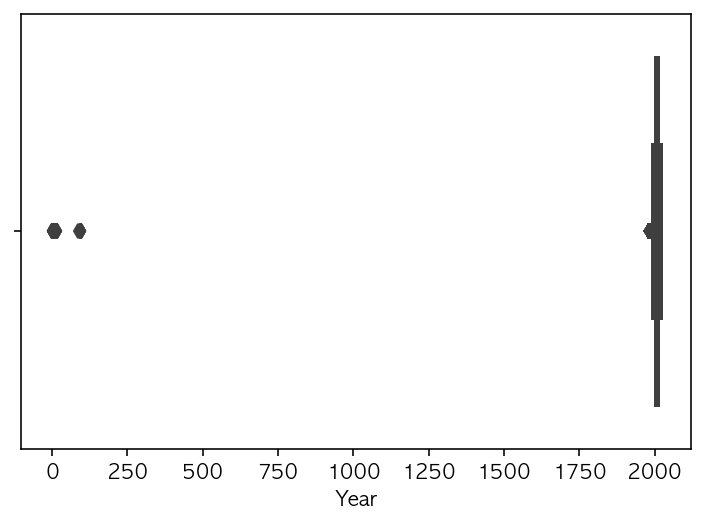

In [ ]:
sns.boxplot(df_raw['Year'].dropna())

In [ ]:
print(np.mean(df_raw['Year']))
print('##########')
print(np.mean(df_raw['Year'].dropna()))

1994.242543026888
##########
1994.242543026888


In [ ]:
df_raw[df_raw['Year'].isna() == True]

Name Platform  Year       Genre  \
31                                       Rock Band     X360   NaN        Misc   
109     Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   NaN      Racing   
273    Jewel Link Chronicles: Mountains of Madness       DS   NaN      Puzzle   
358             Majesty 2: The Fantasy Kingdom Sim     X360   NaN  Simulation   
430                                     Famista 64      N64   NaN      Sports   
...                                            ...      ...   ...         ...   
16240                                Freaky Flyers       GC   NaN      Racing   
16275                               Space Invaders     2600   NaN     Shooter   
16278                                Madden NFL 11      Wii   NaN      Sports   
16425                               Yoostar on MTV     X360   NaN        Misc   
16432                                  Bejeweled 3     X360   NaN      Puzzle   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
31        Electronic Arts     1.93     0.34        0        0.21  
109               Unknown        0        0     0.02           0  
273             Avanquest        0     0.06        0        0.01  
358               Unknown     0.03        0        0           0  
430    Namco Bandai Games        0        0     0.17        0.03  
...                   ...      ...      ...      ...         ...  
16240             Unknown     0.01        0        0           0  
16275               Atari     2.36     0.14       0M        0.03  
16278             Unknown      0.7        0        0         50K  
16425             Unknown     0.06        0        0           0  
16432             Unknown     0.13        0        0        0.01  

[271 rows x 9 columns]

In [ ]:
df_raw['Year'].value_counts().tail(30)

1987.0    16
1988.0    15
1985.0    14
1984.0    14
11.0      10
9.0       10
8.0       10
1980.0     9
10.0       7
3.0        7
6.0        7
16.0       5
15.0       5
5.0        4
4.0        4
95.0       4
98.0       3
7.0        3
96.0       3
2017.0     3
2.0        3
0.0        3
14.0       2
1.0        2
97.0       2
13.0       2
12.0       2
86.0       1
2020.0     1
94.0       1
Name: Year, dtype: int64

### Year데이터 결측치 처리 전 기존 데이터부터 정리

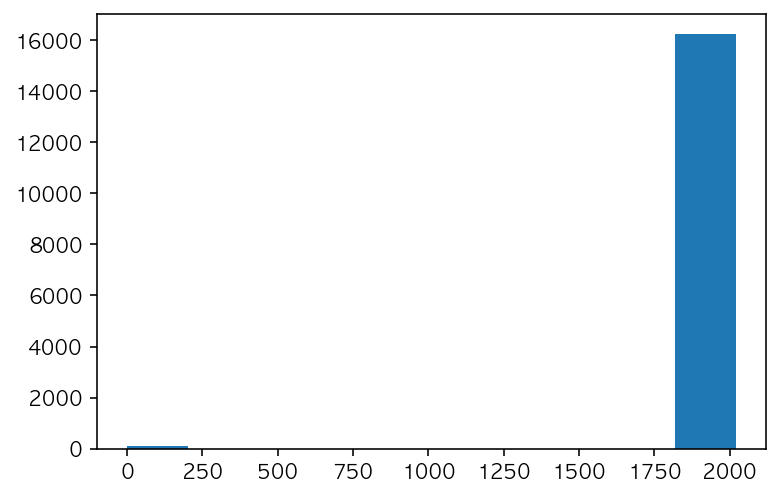

In [ ]:
plt.hist(df_raw['Year'])
plt.show()

In [ ]:
for num, x in zip(df_raw[df_raw['Year'] <= 250].index, list(i for i in df_raw[df_raw['Year'] <= 250]['Year'])):
    
    if df_raw.loc[num,'Year'] >= 0:
        
        if x >= 50:
            x = x + 1900
            df_raw.loc[num,'Year'] = x
    
        else:
            x = x + 2000
            df_raw.loc[num,'Year'] = x

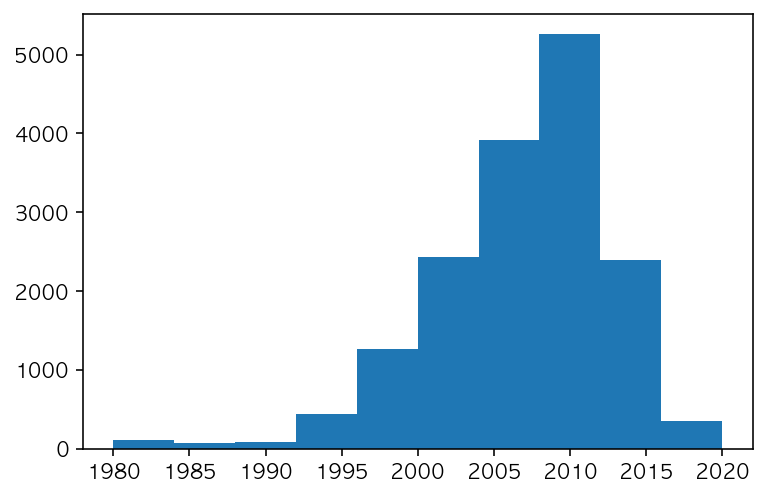

In [ ]:
plt.hist(df_raw['Year'])
plt.show()

중위값:2007.0


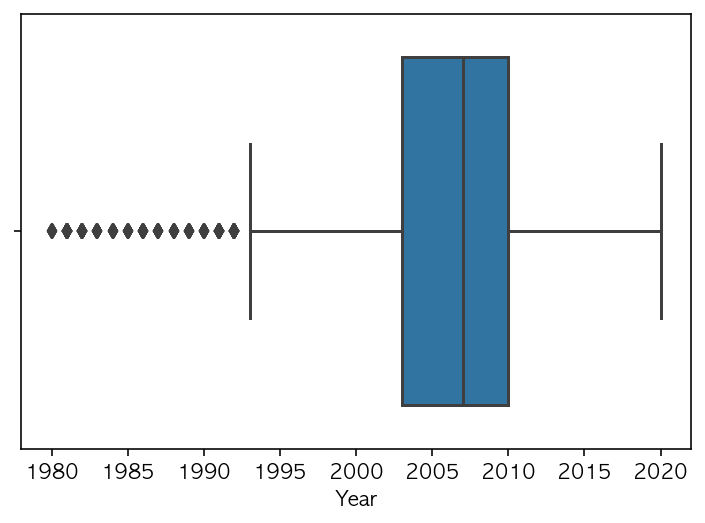

In [ ]:
sns.boxplot(df_raw['Year'].dropna())
print('중위값:{0}'.format(np.median(df_raw['Year'].dropna())))

In [ ]:
df_raw.isna().sum()

Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

## 부적절한 데이터 처리 후 다시 평균확인

In [ ]:
print(np.median(df_raw['Year']))
print('##########')
print(np.median(df_raw['Year'].dropna()))

nan
##########
2007.0


In [ ]:
print(np.mean(df_raw['Year']))
print('##########')
print(np.mean(df_raw['Year'].dropna()))

2006.4064433147546
##########
2006.4064433147546


In [ ]:
# 연도 결측데이터 확인
year_nan_name = list(df_raw[df_raw['Year'].isna() == True]['Name'])

for i in year_nan_name:
    display(df_raw[df_raw['Name'] == i])

Name Platform  Year Genre        Publisher NA_Sales EU_Sales  \
31     Rock Band     X360   NaN  Misc  Electronic Arts     1.93     0.34   
4181   Rock Band      Wii   NaN  Misc        MTV Games     1.35     0.56   
10776  Rock Band      PS3   NaN  Misc  Electronic Arts     0.99     0.41   
12858  Rock Band      PS2   NaN  Misc  Electronic Arts     0.71     0.06   

      JP_Sales Other_Sales  
31           0        0.21  
4181         0         0.2  
10776        0        0.22  
12858        0        0.35

Name Platform  Year   Genre  \
109  Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   NaN  Racing   

    Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
109   Unknown        0        0     0.02           0

Name Platform  Year   Genre  \
273  Jewel Link Chronicles: Mountains of Madness       DS   NaN  Puzzle   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
273  Avanquest        0     0.06        0        0.01

Name Platform    Year       Genre  \
358   Majesty 2: The Fantasy Kingdom Sim     X360     NaN  Simulation   
1252  Majesty 2: The Fantasy Kingdom Sim       PC  2009.0  Simulation   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
358               Unknown     0.03        0        0           0  
1252  Paradox Interactive     0.01        0        0           0

Name Platform  Year   Genre           Publisher NA_Sales EU_Sales  \
430  Famista 64      N64   NaN  Sports  Namco Bandai Games        0        0   

    JP_Sales Other_Sales  
430     0.17        0.03

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
548   Transworld Surf       XB     NaN  Sports     Atari      0.1     0.03   
2407  Transworld Surf      PS2  2002.0  Sports     Atari     0.09     0.07   

     JP_Sales Other_Sales  
548         0           0  
2407        0        0.02

Name Platform    Year Genre            Publisher NA_Sales  \
675   Battle vs. Chess      PS3     NaN  Misc  TopWare Interactive        0   
2457  Battle vs. Chess     X360  2011.0  Misc  TopWare Interactive        0   
9298  Battle vs. Chess       PC     NaN  Misc  TopWare Interactive        0   

     EU_Sales JP_Sales Other_Sales  
675      0.04        0        0.01  
2457     0.03        0           0  
9298     0.02        0        0.01

Name Platform    Year   Genre  \
808    Major League Baseball 2K6      PSP     NaN  Sports   
2339   Major League Baseball 2K6       GC  2006.0  Sports   
3214   Major League Baseball 2K6     X360  2006.0  Sports   
14282  Major League Baseball 2K6       XB  2006.0  Sports   
15566  Major League Baseball 2K6      PS2  2006.0  Sports   

                  Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
808                 Unknown     0.11        0        0        0.01  
2339   Take-Two Interactive     0.13     0.03        0           0  
3214                  Spike     0.34        0        0        0.03  
14282  Take-Two Interactive     0.24     0.07        0        0.01  
15566                 Spike     0.37     0.01        0        0.06

Name Platform  Year   Genre Publisher NA_Sales  \
818  Twisted Metal: Small Brawl       PS   NaN  Action   Unknown      0.1   

    EU_Sales JP_Sales Other_Sales  
818     0.07        0        0.01

Name Platform    Year   Genre        Publisher  \
952    Tiger Woods PGA Tour 07      Wii     NaN  Sports  Electronic Arts   
3128   Tiger Woods PGA Tour 07      PS3  2006.0  Sports  Electronic Arts   
3660   Tiger Woods PGA Tour 07      PSP  2006.0  Sports  Electronic Arts   
4735   Tiger Woods PGA Tour 07     X360  2006.0  Sports  Electronic Arts   
10726  Tiger Woods PGA Tour 07      PS2  2006.0  Sports  Electronic Arts   
13720  Tiger Woods PGA Tour 07       XB  2006.0  Sports  Electronic Arts   

      NA_Sales EU_Sales JP_Sales Other_Sales  
952       0.43        0        0        0.04  
3128      0.31     0.12        0        0.07  
3660       0.2     0.04        0        0.04  
4735      0.44        0        0        0.04  
10726      0.6     0.02        0         0.1  
13720     0.13     0.05        0        0.01

Name Platform  Year    Genre Publisher NA_Sales  \
1011  Tribes: Aerial Assault      PS2   NaN  Shooter   Unknown     0.11   

     EU_Sales JP_Sales Other_Sales  
1011     0.09        0        0.03

Name Platform    Year   Genre  \
1041   Metal Gear Solid 2: Substance       XB     NaN  Action   
15364  Metal Gear Solid 2: Substance      PS2  2002.0  Action   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1041   Konami Digital Entertainment     0.38     0.22        0        0.03  
15364  Konami Digital Entertainment     0.18     0.14     0.16        0.05

Name Platform    Year       Genre Publisher NA_Sales  \
1093   Star Trek: Legacy     X360     NaN  Simulation   Ubisoft     0.14   
11244  Star Trek: Legacy       PC  2006.0  Simulation   Ubisoft        0   

      EU_Sales JP_Sales Other_Sales  
1093      0.03        0        0.02  
11244     0.01        0           0

Name Platform  Year       Genre Publisher NA_Sales  \
1235  My Healthy Cooking Coach       DS   NaN  Simulation   Unknown     0.09   

     EU_Sales JP_Sales Other_Sales  
1235        0        0        0.01

Name Platform    Year Genre Publisher NA_Sales  \
1285   Mega Man X Collection      PS2     NaN  Misc   Unknown     0.12   
13283  Mega Man X Collection       GC  2006.0  Misc    Capcom      0.1   

      EU_Sales JP_Sales Other_Sales  
1285      0.09        0        0.03  
13283     0.03        0           0

Name Platform  Year   Genre                    Publisher  \
1301  Move Fitness      PS3   NaN  Sports  Sony Computer Entertainment   

     NA_Sales EU_Sales JP_Sales Other_Sales  
1301        0     0.17        0        0.05

Name Platform  Year     Genre Publisher NA_Sales  \
1509  Flip's Twisted World      Wii   NaN  Platform   Unknown     0.05   

     EU_Sales JP_Sales Other_Sales  
1509        0        0           0

Name Platform  Year   Genre Publisher NA_Sales  \
1523  Super Puzzle Fighter II      GBA   NaN  Puzzle    Capcom     0.06   

     EU_Sales JP_Sales Other_Sales  
1523     0.02        0           0

Name Platform  Year         Genre Publisher  \
1534  Luminous Arc 2 (JP sales)       DS   NaN  Role-Playing   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
1534        0        0      0.1           0

Name Platform    Year   Genre    Publisher NA_Sales  \
1572   Tomb Raider (2013)       PC     NaN  Action  Square Enix     0.06   
2680   Tomb Raider (2013)      PS3  2013.0  Action  Square Enix      0.6   
10419  Tomb Raider (2013)      PS4  2014.0  Action  Square Enix     0.47   
10583  Tomb Raider (2013)     XOne  2014.0  Action  Square Enix     0.34   
12329  Tomb Raider (2013)     X360  2013.0  Action  Square Enix     0.86   

      EU_Sales JP_Sales Other_Sales  
1572      0.25        0        0.05  
2680      1.31     0.08        0.52  
10419     0.64     0.06        0.25  
10583     0.21        0        0.05  
12329     0.87     0.01        0.17

Name Platform    Year     Genre Publisher NA_Sales  \
1613   Street Fighter IV       PC     NaN  Fighting    Capcom     0.07   
12873  Street Fighter IV     X360  2009.0  Fighting    Capcom     1.82   
13109  Street Fighter IV      PS3  2009.0  Fighting    Capcom     2.02   

      EU_Sales JP_Sales Other_Sales  
1613      0.04        0        0.02  
12873     0.71     0.15        0.26  
13109     1.06     0.58        0.53

Name Platform  Year         Genre     Publisher  \
1796  Agarest Senki: Re-appearance      PS3   NaN  Role-Playing  Idea Factory   

     NA_Sales EU_Sales JP_Sales Other_Sales  
1796        0        0     0.01           0

Name Platform    Year         Genre Publisher  \
1879  Monster Hunter Frontier Online      PS3     NaN  Role-Playing       NaN   
7014  Monster Hunter Frontier Online     X360  2010.0  Role-Playing    Capcom   

     NA_Sales EU_Sales JP_Sales Other_Sales  
1879        0        0     0.05           0  
7014        0        0     0.13           0

Name Platform  Year       Genre Publisher  \
1884  Harvest Moon: Save the Homeland      PS2   NaN  Simulation   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
1884     0.19     0.15        0        0.05

Name Platform    Year   Genre     Publisher NA_Sales EU_Sales  \
1903   NHL Hitz Pro       GC     NaN  Sports       Unknown     0.03     0.01   
9546   NHL Hitz Pro      PS2  2003.0  Sports  Midway Games     0.09     0.07   
11468  NHL Hitz Pro       XB  2003.0  Sports  Midway Games     0.05     0.01   

      JP_Sales Other_Sales  
1903         0           0  
9546         0        0.02  
11468        0           0

Name Platform    Year         Genre    Publisher NA_Sales  \
2026  Final Fantasy XI      PS2     NaN  Role-Playing      Unknown     0.08   
2204  Final Fantasy XI     X360  2006.0  Role-Playing  Square Enix     0.17   

     EU_Sales JP_Sales Other_Sales  
2026     0.06     0.15        0.02  
2204     0.01        0        0.01

Name Platform    Year   Genre Publisher NA_Sales  \
2056   The Golden Compass      Wii     NaN  Action      Sega     0.26   
2552   The Golden Compass      PSP     NaN  Action      Sega     0.11   
5034   The Golden Compass      PS3  2007.0  Action      Sega     0.14   
5258   The Golden Compass       DS  2007.0  Action      Sega     0.28   
10880  The Golden Compass      PS2  2007.0  Action      Sega     0.13   
16031  The Golden Compass     X360  2007.0  Action      Sega      0.3   

      EU_Sales JP_Sales Other_Sales  
2056      0.28        0        0.07  
2552      160K        0         0.1  
5034       0.1        0        0.05  
5258      0.25        0        0.06  
10880        0        0        0.39  
16031     0.12        0        0.04

Name Platform  Year     Genre Publisher NA_Sales EU_Sales JP_Sales  \
2062  Shorts       DS   NaN  Platform   Unknown     0.01        0        0   

     Other_Sales  
2062           0

Name Platform    Year    Genre      Publisher NA_Sales  \
27    World of Tanks       PC  2011.0  Shooter  Wargaming.net        0   
2070  World of Tanks     X360     NaN  Shooter            NaN        0   

     EU_Sales JP_Sales Other_Sales  
27       0.23        0        0.06  
2070     0.03        0           0

Name Platform    Year    Genre   Publisher NA_Sales EU_Sales  \
2130   Call of Duty 3      Wii     NaN  Shooter  Activision     1.19     0.84   
7427   Call of Duty 3      PS2  2006.0  Shooter  Activision     0.89     0.03   
11774  Call of Duty 3      PS3  2006.0  Shooter  Activision      0.6     0.63   
12153  Call of Duty 3     X360  2006.0  Shooter  Activision     1.49     0.93   

      JP_Sales Other_Sales  
2130         0        0.23  
7427         0        0.15  
11774     0.03        0.26  
12153     0.02        0.27

Name Platform    Year   Genre        Publisher NA_Sales  \
1973   Madden NFL 06      PSP  2005.0  Sports  Electronic Arts     0.69   
2137   Madden NFL 06      GBA  2005.0  Sports  Electronic Arts     0.17   
2142   Madden NFL 06     X360     NaN  Sports  Electronic Arts     0.54   
4315   Madden NFL 06       XB  2005.0  Sports  Electronic Arts     1.75   
5189   Madden NFL 06      PS2  2005.0  Sports  Electronic Arts     3.98   
12599  Madden NFL 06       GC  2005.0  Sports  Electronic Arts     0.44   
12838  Madden NFL 06       DS  2005.0  Sports  Electronic Arts     0.11   

      EU_Sales JP_Sales Other_Sales  
1973         0        0        0.06  
2137      0.06        0           0  
2142         0     0.01        0.03  
4315      0.03        0        0.08  
5189      0.26     0.01        0.66  
12599     0.11        0        0.02  
12838        0        0        0.01

Name Platform    Year   Genre  \
2202   Dinotopia: The Sunstone Odyssey       GC     NaN  Action   
10221  Dinotopia: The Sunstone Odyssey       XB  2003.0  Action   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2202          Unknown     0.01        0        0           0  
10221  TDK Mediactive     0.01        0        0           0

Name Platform  Year         Genre Publisher NA_Sales EU_Sales  \
2270   Virtua Quest      PS2   NaN  Role-Playing   Unknown     0.01     0.01   
15897  Virtua Quest       GC   NaN  Role-Playing   Unknown     0.01        0   

      JP_Sales Other_Sales  
2270         0           0  
15897        0           0

Name Platform    Year   Genre Publisher  \
2337   Captain America: Super Soldier       DS     NaN  Action      Sega   
5503   Captain America: Super Soldier      PS3  2011.0  Action      Sega   
11731  Captain America: Super Soldier      3DS  2011.0  Action      Sega   
13946  Captain America: Super Soldier     X360  2011.0  Action      Sega   
14303  Captain America: Super Soldier      Wii     NaN  Action      Sega   

      NA_Sales EU_Sales JP_Sales Other_Sales  
2337      0.05        0        0           0  
5503       0.1     0.07        0        0.03  
11731     0.05     0.02        0        0.01  
13946     0.11     0.05        0        0.01  
14303     0.05        0        0           0

Name Platform  Year Genre  \
2408  Writing and Speaking Beautiful Japanese DS       DS   NaN  Misc   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2408   Unknown        0        0     0.02           0

Name Platform    Year    Genre  \
2478  Disney's Chicken Little: Ace In Action      Wii     NaN  Shooter   
3746  Disney's Chicken Little: Ace In Action       DS  2006.0  Shooter   

                       Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2478  Disney Interactive Studios      0.1        0        0        0.01  
3746  Disney Interactive Studios     0.06        0        0           0

Name Platform    Year   Genre        Publisher NA_Sales  \
482    Madden NFL 2002       GC  2001.0  Sports  Electronic Arts     0.47   
2009   Madden NFL 2002      PS2  2001.0  Sports  Electronic Arts      2.5   
2492   Madden NFL 2002       XB     NaN  Sports          Unknown     0.53   
2964   Madden NFL 2002      N64  2001.0  Sports  Electronic Arts     0.41   
7391   Madden NFL 2002      GBA  2001.0  Sports  Electronic Arts     0.23   
10963  Madden NFL 2002       PS  2001.0  Sports  Electronic Arts     0.78   

      EU_Sales JP_Sales Other_Sales  
482       0.12        0        0.02  
2009      0.16     0.01        0.42  
2492      0.02        0        0.03  
2964      0.02        0           0  
7391      0.08        0        0.01  
10963     0.53        0        0.09

Name Platform  Year   Genre Publisher  \
2527  Maze Craze: A Game of Cops 'n Robbers     2600   NaN  Action     Atari   

     NA_Sales EU_Sales JP_Sales Other_Sales  
2527     0.42     0.02       0K           0

Name Platform  Year     Genre Publisher NA_Sales EU_Sales  \
2545  Sabre Wulf      GBA   NaN  Platform       THQ     0.02     0.01   

     JP_Sales Other_Sales  
2545        0           0

Name Platform    Year   Genre Publisher NA_Sales  \
2056   The Golden Compass      Wii     NaN  Action      Sega     0.26   
2552   The Golden Compass      PSP     NaN  Action      Sega     0.11   
5034   The Golden Compass      PS3  2007.0  Action      Sega     0.14   
5258   The Golden Compass       DS  2007.0  Action      Sega     0.28   
10880  The Golden Compass      PS2  2007.0  Action      Sega     0.13   
16031  The Golden Compass     X360  2007.0  Action      Sega      0.3   

      EU_Sales JP_Sales Other_Sales  
2056      0.28        0        0.07  
2552      160K        0         0.1  
5034       0.1        0        0.05  
5258      0.25        0        0.06  
10880        0        0        0.39  
16031     0.12        0        0.04

Name Platform  Year      Genre  \
2824  Alone in the Dark: The New Nightmare       PS   NaN  Adventure   

       Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2824  Infogrames     0.09     0.06        0        0.01

Name Platform  Year     Genre  \
2934  Disney's Cinderella: Magical Dreams      GBA   NaN  Platform   

                       Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2934  Disney Interactive Studios      0.1     0.04        0           0

Name Platform  Year       Genre Publisher NA_Sales  \
2970  Chou Soujuu Mecha MG       DS   NaN  Simulation       NaN        0   

     EU_Sales JP_Sales Other_Sales  
2970        0     0.06           0

Name Platform  Year     Genre Publisher NA_Sales  \
3031  Donkey Kong Land III       GB   NaN  Platform  Nintendo     0.68   

     EU_Sales JP_Sales Other_Sales  
3031     0.31        0        0.04

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
3069   Rayman Arena       XB     NaN  Racing   Unknown     0.05     0.01   
7692   Rayman Arena      PS2  2001.0  Racing   Ubisoft     0.29     0.23   
10408  Rayman Arena       GC  2002.0  Racing   Ubisoft     0.11     0.03   

      JP_Sales Other_Sales  
3069         0           0  
7692         0        0.08  
10408        0           0

Name Platform  Year Genre           Publisher NA_Sales  \
3135  eJay Clubworld      PS2   NaN  Misc  Empire Interactive     0.07   

     EU_Sales JP_Sales Other_Sales  
3135     0.06        0        0.02

Name Platform    Year Genre  \
1932  Danganronpa: Trigger Happy Havoc      PSV  2013.0  Misc   
3182  Danganronpa: Trigger Happy Havoc      PSP     NaN  Misc   

                 Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1932  Nippon Ichi Software     0.14     0.07     0.15        0.06  
3182               Unknown        0        0     0.24           0

Name Platform  Year   Genre Publisher NA_Sales  \
3184  Action Man-Operation Extreme       PS   NaN  Action       NaN     0.05   

     EU_Sales JP_Sales Other_Sales  
3184     0.03        0        0.01

Name Platform  Year       Genre Publisher NA_Sales EU_Sales  \
3187  Jet Impulse       DS   NaN  Simulation  Nintendo        0        0   

     JP_Sales Other_Sales  
3187     0.02           0

Name Platform  Year   Genre Publisher NA_Sales  \
3238  Football Manager 2007     X360   NaN  Sports      Sega        0   

     EU_Sales JP_Sales Other_Sales  
3238     0.01        0           0

Name Platform    Year  \
729    The Chronicles of Narnia: The Lion, The Witch ...       DS  2005.0   
1396   The Chronicles of Narnia: The Lion, The Witch ...      PS2  2005.0   
2444   The Chronicles of Narnia: The Lion, The Witch ...       XB  2005.0   
3291   The Chronicles of Narnia: The Lion, The Witch ...      GBA     NaN   
13583  The Chronicles of Narnia: The Lion, The Witch ...       GC     NaN   

        Genre                   Publisher NA_Sales EU_Sales JP_Sales  \
729    Action  Disney Interactive Studios     0.15     0.02        0   
1396   Action  Disney Interactive Studios     0.36     0.01        0   
2444   Action  Disney Interactive Studios     0.15     0.04        0   
3291   Action  Disney Interactive Studios     0.48     0.18        0   
13583  Action  Disney Interactive Studios     0.22     0.06        0   

      Other_Sales  
729          0.01  
1396         0.06  
2444         0.01  
3291         0.01  
13583        0.01

Name Platform    Year   Genre  \
3347  LEGO Batman: The Videogame      Wii     NaN  Action   
3775  LEGO Batman: The Videogame       DS  2008.0  Action   
4815  LEGO Batman: The Videogame       PC  2008.0  Action   
5592  LEGO Batman: The Videogame     X360  2008.0  Action   
5849  LEGO Batman: The Videogame      PS3  2008.0  Action   
9641  LEGO Batman: The Videogame      PS2  2008.0  Action   
9958  LEGO Batman: The Videogame      PSP     NaN  Action   

                                   Publisher NA_Sales EU_Sales JP_Sales  \
3347  Warner Bros. Interactive Entertainment     1.86     1.02        0   
3775  Warner Bros. Interactive Entertainment     1.79     1.06        0   
4815  Warner Bros. Interactive Entertainment     0.02     0.03        0   
5592  Warner Bros. Interactive Entertainment     2.03     1.03        0   
5849  Warner Bros. Interactive Entertainment     0.72     0.42        0   
9641  Warner Bros. Interactive Entertainment     0.72     0.03        0   
9958  Warner Bros. Interactive Entertainment     0.57     0.46        0   

     Other_Sales  
3347        0.29  
3775        0.29  
4815        0.01  
5592        0.32  
5849        0.19  
9641        0.52  
9958        0.28

Name Platform    Year   Genre  \
3407   Major League Baseball 2K8      PSP     NaN  Sports   
7231   Major League Baseball 2K8      Wii  2008.0  Sports   
7333   Major League Baseball 2K8      PS2  2008.0  Sports   
9571   Major League Baseball 2K8     X360  2008.0  Sports   
15028  Major League Baseball 2K8      PS3  2008.0  Sports   

                  Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3407                Unknown     0.03        0        0           0  
7231   Take-Two Interactive     0.13        0        0        0.01  
7333     Bethesda Softworks     0.07     0.06        0        0.02  
9571     Bethesda Softworks     0.56        0        0        0.05  
15028    Bethesda Softworks     0.28        0        0        0.02

Name Platform  Year      Genre Publisher NA_Sales  \
3533  B.L.U.E.: Legend of Water       PS   NaN  Adventure       NaN        0   

     EU_Sales JP_Sales Other_Sales  
3533        0     0.04           0

Name Platform  Year     Genre Publisher NA_Sales  \
3562  wwe Smackdown vs. Raw 2006      PS2   NaN  Fighting       NaN     1.57   

     EU_Sales JP_Sales Other_Sales  
3562     1.02        0        0.41

Name Platform  Year         Genre Publisher NA_Sales EU_Sales JP_Sales  \
3605  TERA       PC   NaN  Role-Playing   Unknown     0.24     0.12        0   

     Other_Sales  
3605        0.05

Name Platform  Year     Genre Publisher  \
3639  Homeworld Remastered Collection       PC   NaN  Strategy       NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales  
3639        0     0.01        0           0

Name Platform  Year Genre  \
3811  Shonen Jump's Yu-Gi-Oh! GX Card Almanac       DS   NaN  Misc   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3811  Konami Digital Entertainment        0        0     0.02           0

Name Platform    Year Genre                    Publisher  \
3832  Pac-Man Fever       GC     NaN  Misc                      Unknown   
5542  Pac-Man Fever      PS2  2001.0  Misc  Sony Computer Entertainment   

     NA_Sales EU_Sales JP_Sales Other_Sales  
3832    0.21M     0.06        0        0.01  
5542     0.25      0.2        0        0.07

Name Platform    Year   Genre   Publisher NA_Sales EU_Sales  \
3841   Street Hoops       GC     NaN  Sports     Unknown     0.09     0.02   
8868   Street Hoops       XB  2002.0  Sports  Activision     0.21     0.06   
11271  Street Hoops      PS2  2002.0  Sports  Activision     0.45     0.35   

      JP_Sales Other_Sales  
3841         0           0  
8868         0        0.01  
11271        0        0.12

Name Platform    Year   Genre  \
3895   WRC: FIA World Rally Championship      PS3     NaN  Racing   
4124   WRC: FIA World Rally Championship     X360     NaN  Racing   
7131   WRC: FIA World Rally Championship       PC     NaN  Racing   
12731  WRC: FIA World Rally Championship      PSP  2005.0  Racing   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3895              Black Bean Games        0     0.15     0.01        0.05  
4124              Black Bean Games        0      0.1        0        0.02  
7131              Black Bean Games        0     0.01        0           0  
12731  Sony Computer Entertainment     0.02     0.01        0        0.01

Name Platform  Year   Genre          Publisher  \
3942  Legacy of Kain: Soul Reaver       PS   NaN  Action  Eidos Interactive   

     NA_Sales EU_Sales JP_Sales Other_Sales  
3942     0.58      0.4        0        0.07

Name Platform    Year   Genre  \
3895   WRC: FIA World Rally Championship      PS3     NaN  Racing   
4124   WRC: FIA World Rally Championship     X360     NaN  Racing   
7131   WRC: FIA World Rally Championship       PC     NaN  Racing   
12731  WRC: FIA World Rally Championship      PSP  2005.0  Racing   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3895              Black Bean Games        0     0.15     0.01        0.05  
4124              Black Bean Games        0      0.1        0        0.02  
7131              Black Bean Games        0     0.01        0           0  
12731  Sony Computer Entertainment     0.02     0.01        0        0.01

Name Platform    Year Genre           Publisher NA_Sales  \
2479   Namco Museum      PS2  2001.0  Misc  Namco Bandai Games     1.73   
4165   Namco Museum       XB     NaN  Misc             Unknown     0.77   
13967  Namco Museum      GBA  2001.0  Misc  Namco Bandai Games        3   
15453  Namco Museum       GC  2002.0  Misc  Namco Bandai Games     0.48   

      EU_Sales JP_Sales Other_Sales  
2479      0.07        0        0.02  
4165      0.11        0        0.04  
13967     1.11     0.05        0.07  
15453     0.13        0        0.02

Name Platform  Year Genre        Publisher NA_Sales EU_Sales  \
31     Rock Band     X360   NaN  Misc  Electronic Arts     1.93     0.34   
4181   Rock Band      Wii   NaN  Misc        MTV Games     1.35     0.56   
10776  Rock Band      PS3   NaN  Misc  Electronic Arts     0.99     0.41   
12858  Rock Band      PS2   NaN  Misc  Electronic Arts     0.71     0.06   

      JP_Sales Other_Sales  
31           0        0.21  
4181         0         0.2  
10776        0        0.22  
12858        0        0.35

Name Platform  Year   Genre Publisher NA_Sales  \
4196   Test Drive Unlimited 2     X360   NaN  Racing     Atari      0.3   
13256  Test Drive Unlimited 2       PC   NaN  Racing     Atari     0.05   
13357  Test Drive Unlimited 2      PS3   NaN  Racing     Atari     0.16   

      EU_Sales JP_Sales Other_Sales  
4196      0.32        0        0.07  
13256     0.11        0        0.03  
13357     0.35     0.01        0.12

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
4230  Sega Rally 2006      PS2   NaN  Racing   Unknown        0        0   

     JP_Sales Other_Sales  
4230     0.04           0

Name Platform    Year Genre                     Publisher  \
2665   Rock Revolution       DS  2008.0  Misc  Konami Digital Entertainment   
4238   Rock Revolution      Wii     NaN  Misc                       Unknown   
6223   Rock Revolution      PS3     NaN  Misc                       Unknown   
12102  Rock Revolution     X360  2008.0  Misc  Konami Digital Entertainment   

      NA_Sales EU_Sales JP_Sales Other_Sales  
2665       0.1        0        0        0.01  
4238      0.07        0        0        0.01  
6223      0.25        0        0        0.02  
12102     0.25        0        0        0.02

Name Platform    Year   Genre Publisher NA_Sales  \
1358   Shaun White Snowboarding      PS3  2008.0  Sports   Ubisoft    0.31M   
1725   Shaun White Snowboarding      PS2  2008.0  Sports   Ubisoft     0.15   
4255   Shaun White Snowboarding     X360     NaN  Sports   Ubisoft     0.48   
7178   Shaun White Snowboarding      PSP  2008.0  Sports   Ubisoft     0.26   
15331  Shaun White Snowboarding       DS  2008.0  Sports   Ubisoft     0.21   

      EU_Sales JP_Sales Other_Sales  
1358      0.24     0.01         0.1  
1725      0.12        0        0.04  
4255      0.26        0        0.08  
7178      0.03        0        0.03  
15331        0        0        0.02

Name Platform  Year  \
4308  Umineko no Naku Koro ni San: Shinjitsu to Gens...      PS3   NaN   

          Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
4308  Adventure       NaN        0        0     0.02           0

Name Platform    Year   Genre  \
4488   The Lord of the Rings: War in the North      PS3     NaN  Action   
11665  The Lord of the Rings: War in the North     X360     NaN  Action   
13293  The Lord of the Rings: War in the North       PC  2011.0  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
4488   Warner Bros. Interactive Entertainment     0.25     0.45     0.01   
11665  Warner Bros. Interactive Entertainment     0.52     0.26        0   
13293  Warner Bros. Interactive Entertainment     0.04     0.11        0   

      Other_Sales  
4488         0.15  
11665        0.08  
13293        0.03

Name Platform  Year       Genre              Publisher NA_Sales  \
4497  Pet Zombies      3DS   NaN  Simulation  Majesco Entertainment     0.18   

     EU_Sales JP_Sales Other_Sales  
4497        0        0        0.01

Name Platform    Year   Genre        Publisher  \
4501   WCW Backstage Assault      N64     NaN  Action          Unknown   
14573  WCW Backstage Assault       PS  1999.0  Action  Electronic Arts   

      NA_Sales EU_Sales JP_Sales Other_Sales  
4501      0.11     0.03        0           0  
14573     0.12     0.08        0        0.01

Name Platform  Year     Genre Publisher NA_Sales EU_Sales JP_Sales  \
4511  Swords      Wii   NaN  Fighting   Unknown     0.03        0        0   

     Other_Sales  
4511           0

Name Platform  Year   Genre   Publisher NA_Sales EU_Sales  \
4521  Ghostbusters II     2600   NaN  Action  Activision      0.2     0.01   

     JP_Sales Other_Sales  
4521        0           0

Name Platform    Year   Genre     Publisher NA_Sales EU_Sales  \
2710   Bejeweled 3       PC  2010.0  Puzzle  PopCap Games     0.02     0.05   
4608   Bejeweled 3      PS3     NaN  Puzzle       Unknown     0.13        0   
10269  Bejeweled 3       DS     NaN  Puzzle       Unknown     0.32     0.02   
16432  Bejeweled 3     X360     NaN  Puzzle       Unknown     0.13        0   

      JP_Sales Other_Sales  
2710         0        0.01  
4608         0        0.01  
10269        0        0.03  
16432        0        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales JP_Sales  \
4617  Hangman     2600   NaN  Puzzle     Atari     350K     0.02        0   

     Other_Sales  
4617           0

Name Platform  Year       Genre Publisher  \
4714  Charm Girls Club: My Fashion Show       DS   NaN  Simulation   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
4714     0.08        0        0        0.01

Name Platform  Year         Genre Publisher NA_Sales  \
4865  Beyond the Labyrinth      3DS   NaN  Role-Playing   Unknown        0   

     EU_Sales JP_Sales Other_Sales  
4865        0     0.03           0

Name Platform  Year    Genre    Publisher NA_Sales EU_Sales  \
4911  Dream Trigger 3D      3DS   NaN  Shooter  D3Publisher     0.04     0.02   

     JP_Sales Other_Sales  
4911        0        0.01

Name Platform  Year   Genre                     Publisher  \
5055  Demon Chaos      PS2   NaN  Action  Konami Digital Entertainment   

     NA_Sales EU_Sales JP_Sales Other_Sales  
5055        0        0     0.09           0

Name Platform    Year    Genre             Publisher NA_Sales  \
745   BioShock 2     X360  2010.0  Shooter  Take-Two Interactive     1.45   
5140  BioShock 2       PC     NaN  Shooter  Take-Two Interactive     0.02   
6019  BioShock 2      PS3  2010.0  Shooter  Take-Two Interactive     0.85   

     EU_Sales JP_Sales Other_Sales  
745      0.55     0.02        0.19  
5140     0.19        0        0.04  
6019     0.47     0.02        0.22

Name Platform  Year   Genre Publisher NA_Sales EU_Sales JP_Sales  \
5144  Yakuza 4      PS3   NaN  Action      Sega     0.15     0.14     0.63   

     Other_Sales  
5144        0.05

Name Platform    Year       Genre  \
5160  Harvest Moon: The Tale of Two Towns      3DS     NaN  Simulation   
9521  Harvest Moon: The Tale of Two Towns       DS  2010.0  Simulation   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
5160   Unknown     0.28        0        0        0.02  
9521   Natsume     0.27     0.06     0.22        0.03

Name Platform    Year Genre          Publisher  \
5175   Dance! It's Your Stage      Wii     NaN  Misc  DTP Entertainment   
13487  Dance! It's Your Stage      PS3  2011.0  Misc  DTP Entertainment   

      NA_Sales EU_Sales JP_Sales Other_Sales  
5175        0K     0.01        0           0  
13487        0     0.02       0M        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
5230  Circus Atari     2600   NaN  Action     Atari     0.43     0.03   

     JP_Sales Other_Sales  
5230        0           0

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform    Year   Genre          Publisher  \
1385   Hitman 2: Silent Assassin      PS2  2002.0  Action  Eidos Interactive   
5674   Hitman 2: Silent Assassin       XB     NaN  Action  Eidos Interactive   
10195  Hitman 2: Silent Assassin       GC  2003.0  Action  Eidos Interactive   

      NA_Sales EU_Sales JP_Sales Other_Sales  
1385      1.36     1.15     0.04        0.41  
5674      0.76     0.38        0        0.05  
10195      0.1     0.03        0           0

Name Platform  Year      Genre Publisher NA_Sales EU_Sales  \
5720  Adventure     2600   NaN  Adventure     Atari     1.21     0.08   

     JP_Sales Other_Sales  
5720        0        0.01

Name Platform  Year   Genre Publisher NA_Sales  \
5728  Nintendo Puzzle Collection       GC   NaN  Puzzle   Unknown        0   

     EU_Sales JP_Sales Other_Sales  
5728        0     0.13           0

Name Platform    Year     Genre  \
3005   Samurai Shodown Anthology      Wii  2008.0  Fighting   
5757   Samurai Shodown Anthology      PSP     NaN  Fighting   
12519  Samurai Shodown Anthology      PS2  2008.0  Fighting   

                    Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3005   Ignition Entertainment     0.06        0        0           0  
5757   Ignition Entertainment     0.08        0        0        0.01  
12519  Ignition Entertainment     0.07     0.06        0        0.02

Name Platform    Year Genre Publisher NA_Sales EU_Sales JP_Sales  \
5957   Rocksmith       PC     NaN  Misc   Unknown     0.06     0.04        0   
6173   Rocksmith     X360  2011.0  Misc   Ubisoft     0.84      0.2     0.01   
13180  Rocksmith      PS3  2011.0  Misc   Ubisoft     0.52     0.38     0.09   

      Other_Sales  
5957         0.01  
6173         0.08  
13180        0.17

Name Platform  Year     Genre  \
5994  Samurai Spirits: Tenkaichi Kenkakuden      PS2   NaN  Fighting   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
5994   Unknown        0        0     0.03           0

Name Platform    Year Genre             Publisher NA_Sales  \
4912   Wheel of Fortune       DS  2010.0  Misc                   THQ     0.41   
6118   Wheel of Fortune      PS2     NaN  Misc               Unknown     0.47   
8665   Wheel of Fortune      N64  1997.0  Misc  Take-Two Interactive      0.2   
11047  Wheel of Fortune       PS  1998.0  Misc    Hasbro Interactive     0.99   
15868  Wheel of Fortune      Wii  2010.0  Misc                   THQ     0.89   

      EU_Sales JP_Sales Other_Sales  
4912         0        0         30K  
6118      0.36        0        0.12  
8665      0.05        0           0  
11047     0.22        0        0.04  
15868     0.04        0        0.06

Name Platform  Year       Genre  \
6152  Mobile Ops: The One Year War     X360   NaN  Simulation   

               Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
6152  Namco Bandai Games        0        0     0.06           0

Name Platform    Year     Genre      Publisher  \
6178  Record of Agarest War Zero      PS3     NaN  Strategy     Ghostlight   
9769  Record of Agarest War Zero     X360  2010.0  Strategy  Compile Heart   

     NA_Sales EU_Sales JP_Sales Other_Sales  
6178     0.09        0     0.03        0.01  
9769     0.09        0        0        0.01

Name Platform  Year   Genre Publisher  \
6209  Atsumare! Power Pro Kun no DS Koushien       DS   NaN  Sports       NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales  
6209        0        0      0.1           0

Name Platform    Year Genre                     Publisher  \
2665   Rock Revolution       DS  2008.0  Misc  Konami Digital Entertainment   
4238   Rock Revolution      Wii     NaN  Misc                       Unknown   
6223   Rock Revolution      PS3     NaN  Misc                       Unknown   
12102  Rock Revolution     X360  2008.0  Misc  Konami Digital Entertainment   

      NA_Sales EU_Sales JP_Sales Other_Sales  
2665       0.1        0        0        0.01  
4238      0.07        0        0        0.01  
6223      0.25        0        0        0.02  
12102     0.25        0        0        0.02

Name Platform  Year    Genre Publisher  \
6257  Combat Elite: WWII Paratroopers      PS2   NaN  Shooter   Unknown   
8812  Combat Elite: WWII Paratroopers       XB   NaN  Shooter   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
6257     0.03     0.02        0        0.01  
8812     0.02     0.01        0           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales JP_Sales  \
6288  Home Run     2600   NaN  Sports     Atari     0.14     0.01        0   

     Other_Sales  
6288           0

Name Platform  Year         Genre Publisher  \
6318  Legacy of Ys: Books I & II       DS   NaN  Role-Playing   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
6318     0.02        0        0           0

Name Platform    Year   Genre    Publisher NA_Sales EU_Sales JP_Sales  \
1251   GRID      PS3  2008.0  Racing  Codemasters     0.31     0.57     0.03   
4657   GRID     X360  2008.0  Racing  Codemasters     0.33     0.44     0.01   
6354   GRID       DS     NaN  Racing  Codemasters     0.04     0.01        0   
13488  GRID       PC     NaN  Racing  Codemasters        0     0.03        0   

      Other_Sales  
1251          0.2  
4657         0.09  
6354            0  
13488        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
6375   Backbreaker      PS3   NaN  Sports   Unknown     0.16        0   
10534  Backbreaker     X360   NaN  Sports   Unknown     0.17        0   

      JP_Sales Other_Sales  
6375         0        0.01  
10534        0        0.01

Name Platform    Year   Genre    Publisher NA_Sales  \
5550   Dead Island: Riptide     X360  2013.0  Action  Deep Silver     0.44   
6385   Dead Island: Riptide       PC     NaN  Action  Deep Silver        0   
10234  Dead Island: Riptide      PS3  2013.0  Action  Deep Silver     0.26   

      EU_Sales JP_Sales Other_Sales  
5550      0.27     0.01        0.07  
6385      0.07        0        0.01  
10234      0.2      70K        0.09

Name Platform    Year    Genre Publisher  \
6392   Brothers in Arms: Furious 4     X360     NaN  Shooter       NaN   
15058  Brothers in Arms: Furious 4      PS3  2012.0  Shooter   Ubisoft   

      NA_Sales EU_Sales JP_Sales Other_Sales  
6392      0.01        0        0           0  
15058     0.01     0.05        0        0.02

Name Platform    Year   Genre  \
6512   Happy Feet Two      Wii     NaN  Action   
8076   Happy Feet Two      PS3     NaN  Action   
11882  Happy Feet Two      3DS  2011.0  Action   
12710  Happy Feet Two     X360     NaN  Action   
15332  Happy Feet Two       DS     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
6512   Warner Bros. Interactive Entertainment     0.07     0.01        0   
8076   Warner Bros. Interactive Entertainment     0.09     0.01        0   
11882  Warner Bros. Interactive Entertainment     0.08     0.02        0   
12710  Warner Bros. Interactive Entertainment     0.08     0.01        0   
15332  Warner Bros. Interactive Entertainment     0.09     0.02        0   

      Other_Sales  
6512         0.01  
8076         0.01  
11882        0.01  
12710        0.01  
15332        0.01

Name Platform  Year   Genre   Publisher NA_Sales EU_Sales  \
6575  Fishing Derby     2600   NaN  Sports  Activision     0.48     0.03   

     JP_Sales Other_Sales  
6575        0        0.01

Name Platform  Year    Genre  \
6623  Unreal Championship 2: The Liandri Conflict       XB   NaN  Shooter   

         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
6623  Midway Games     0.22     0.05        0        0.01

Name Platform    Year   Genre   Publisher NA_Sales EU_Sales  \
422    Shrek the Third      PS2  2007.0  Action  Activision      0.4     0.02   
1745   Shrek the Third     X360  2007.0  Action  Activision     0.54      0.1   
6779   Shrek the Third       DS     NaN  Action  Activision     0.26    0.02M   
8957   Shrek the Third      PSP  2007.0  Action  Activision     0.08     0.15   
15025  Shrek the Third      Wii  2007.0  Action  Activision     0.26     0.01   

      JP_Sales Other_Sales  
422          0        0.07  
1745         0        0.06  
6779         0        0.02  
8957         0        0.09  
15025        0        0.02

Name Platform    Year   Genre        Publisher NA_Sales  \
2758  Madden NFL 2004      GBA  2003.0  Sports  Electronic Arts     0.22   
4065  Madden NFL 2004       XB  2003.0  Sports  Electronic Arts     1.02   
6663  Madden NFL 2004       GC  2003.0  Sports  Electronic Arts      0.4   
6949  Madden NFL 2004      PS2     NaN  Sports  Electronic Arts     4.26   

     EU_Sales JP_Sales Other_Sales  
2758     0.08        0        0.01  
4065     0.02        0        0.05  
6663      0.1        0        0.01  
6949     0.26     0.01        0.71

Name Platform    Year   Genre             Publisher  \
7008   College Hoops 2K6      PS2     NaN  Sports               Unknown   
12694  College Hoops 2K6       XB  2005.0  Sports  Take-Two Interactive   
14524  College Hoops 2K6     X360  2006.0  Sports  Take-Two Interactive   

      NA_Sales EU_Sales JP_Sales Other_Sales  
7008      0.12      0.1        0        0.03  
12694     0.07     0.02        0           0  
14524     0.11        0        0        0.01

Name Platform    Year   Genre  \
3895   WRC: FIA World Rally Championship      PS3     NaN  Racing   
4124   WRC: FIA World Rally Championship     X360     NaN  Racing   
7131   WRC: FIA World Rally Championship       PC     NaN  Racing   
12731  WRC: FIA World Rally Championship      PSP  2005.0  Racing   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3895              Black Bean Games        0     0.15     0.01        0.05  
4124              Black Bean Games        0      0.1        0        0.02  
7131              Black Bean Games        0     0.01        0           0  
12731  Sony Computer Entertainment     0.02     0.01        0        0.01

Name Platform    Year   Genre       Publisher  \
4057  Aquaman: Battle for Atlantis       GC  2003.0  Action  TDK Mediactive   
7150  Aquaman: Battle for Atlantis       XB     NaN  Action         Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
4057     0.01        0        0           0  
7150     0.01        0        0           0

Name Platform    Year   Genre   Publisher NA_Sales EU_Sales  \
7619   The Smurfs      3DS     NaN  Action     Unknown        0     0.01   
11131  The Smurfs       DS  2011.0  Action     Ubisoft     0.24     0.14   
14613  The Smurfs       PS  1998.0  Action  Infogrames     0.02     0.02   

      JP_Sales Other_Sales  
7619         0           0  
11131        0        0.04  
14613        0           0

Name Platform    Year   Genre     Publisher NA_Sales  \
5056   MLB SlugFest 20-03       XB  2002.0  Sports  Midway Games     0.15   
7682   MLB SlugFest 20-03      PS2     NaN  Sports       Unknown     0.41   
12618  MLB SlugFest 20-03       GC  2002.0  Sports  Midway Games     0.11   

      EU_Sales JP_Sales Other_Sales  
5056      0.04        0        0.01  
7682      0.32        0        0.11  
12618     0.03        0           0

Name Platform  Year     Genre Publisher NA_Sales EU_Sales  \
7686  Drill Dozer      GBA   NaN  Platform   Unknown     0.04     0.01   

     JP_Sales Other_Sales  
7686        0           0

Name Platform  Year       Genre Publisher NA_Sales EU_Sales  \
7713  Our House Party!      Wii   NaN  Simulation   Unknown     0.13        0   

     JP_Sales Other_Sales  
7713        0        0.01

Name Platform  Year    Genre Publisher NA_Sales EU_Sales JP_Sales  \
7774  Saint      Wii   NaN  Shooter   Unknown      20K        0        0   

     Other_Sales  
7774           0

Name Platform  Year   Genre Publisher NA_Sales  \
7792  Mountain Bike Adrenaline      PS2   NaN  Sports   Unknown     0.03   

     EU_Sales JP_Sales Other_Sales  
7792     0.02        0        0.01

Name Platform  Year         Genre    Publisher NA_Sales  \
7847  Egg Monster Hero       DS   NaN  Role-Playing  Square Enix        0   

     EU_Sales JP_Sales Other_Sales  
7847        0     0.09           0

Name Platform  Year    Genre Publisher NA_Sales  \
8055  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   
9184  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   

     EU_Sales JP_Sales Other_Sales  
8055        0     0.02           0  
9184        0     0.02           0

Name Platform    Year   Genre  \
6512   Happy Feet Two      Wii     NaN  Action   
8076   Happy Feet Two      PS3     NaN  Action   
11882  Happy Feet Two      3DS  2011.0  Action   
12710  Happy Feet Two     X360     NaN  Action   
15332  Happy Feet Two       DS     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
6512   Warner Bros. Interactive Entertainment     0.07     0.01        0   
8076   Warner Bros. Interactive Entertainment     0.09     0.01        0   
11882  Warner Bros. Interactive Entertainment     0.08     0.02        0   
12710  Warner Bros. Interactive Entertainment     0.08     0.01        0   
15332  Warner Bros. Interactive Entertainment     0.09     0.02        0   

      Other_Sales  
6512         0.01  
8076         0.01  
11882        0.01  
12710        0.01  
15332        0.01

Name Platform  Year Genre Publisher NA_Sales EU_Sales  \
8244  Payout Poker & Casino      PSP   NaN  Misc   Unknown     0.02       0M   

     JP_Sales Other_Sales  
8244        0           0

Name Platform    Year   Genre           Publisher NA_Sales  \
8333   Splatterhouse      PS3     NaN  Action  Namco Bandai Games     0.13   
13714  Splatterhouse     X360  2010.0  Action  Namco Bandai Games     0.14   

      EU_Sales JP_Sales Other_Sales  
8333      0.02        0        0.02  
13714     0.03        0        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales JP_Sales  \
8350  Jet X20      PS2   NaN  Racing   Unknown     0.11     0.09       0K   

     Other_Sales  
8350        0.03

Name Platform  Year Genre Publisher NA_Sales  \
8422  Reader Rabbit 2nd Grade      Wii   NaN  Misc   Unknown     0.05   

     EU_Sales JP_Sales Other_Sales  
8422        0        0           0

Name Platform  Year   Genre Publisher NA_Sales  \
8470  Jurassic Park: The Game     X360   NaN  Action   Unknown     0.15   

     EU_Sales JP_Sales Other_Sales  
8470        0        0        0.01

Name Platform  Year         Genre          Publisher  \
8525  Half-Minute Hero 2      PSP   NaN  Role-Playing  Rising Star Games   

     NA_Sales EU_Sales JP_Sales Other_Sales  
8525        0        0     0.04           0

Name Platform    Year   Genre  \
2013   LEGO Indiana Jones: The Original Adventures      PS3  2008.0  Action   
3411   LEGO Indiana Jones: The Original Adventures       DS  2008.0  Action   
8529   LEGO Indiana Jones: The Original Adventures      Wii     NaN  Action   
9736   LEGO Indiana Jones: The Original Adventures      PS2  2008.0  Action   
9903   LEGO Indiana Jones: The Original Adventures      PSP  2008.0  Action   
12392  LEGO Indiana Jones: The Original Adventures     X360  2008.0  Action   
15034  LEGO Indiana Jones: The Original Adventures       PC  2008.0  Action   

        Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2013   Activision     0.44     440K        0        0.18  
3411   Activision     1.42    0.61M        0        0.21  
8529    LucasArts     1.54     0.63        0        0.22  
9736    LucasArts      0.6     0.01        0        0.76  
9903    LucasArts      0.4     0.49        0        0.29  
12392  Activision      2.4     1.03        0        0.36  
15034   LucasArts     0.02     0.02        0        0.01

Name Platform  Year Genre Publisher  \
8546  Build-A-Bear Workshop: Friendship Valley      Wii   NaN  Misc   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
8546     0.06        0        0           0

Name Platform    Year    Genre           Publisher NA_Sales EU_Sales  \
8600   Wet     X360     NaN  Shooter  Bethesda Softworks     0.23     0.21   
11671  Wet      PS3  2009.0  Shooter  Bethesda Softworks     0.22     0.27   

      JP_Sales Other_Sales  
8600      0.01        0.05  
11671     0.01        0.11

Name Platform  Year       Genre      Publisher NA_Sales  \
8638   Port Royale 3     X360   NaN  Simulation  Kalypso Media     0.06   
12307  Port Royale 3      PS3   NaN  Simulation  Kalypso Media     0.06   

      EU_Sales JP_Sales Other_Sales  
8638         0        0           0  
12307        0        0        0.01

Name Platform    Year     Genre Publisher NA_Sales  \
8651   Sonic the Hedgehog      PS3     NaN  Platform       NaN        0   
10045  Sonic the Hedgehog     X360  2006.0  Platform      Sega     0.44   
14729  Sonic the Hedgehog      GEN  1991.0  Platform      Sega     3.03   
15705  Sonic the Hedgehog      PS3  2006.0  Platform      Sega     0.41   

      EU_Sales JP_Sales Other_Sales  
8651      0.48        0           0  
10045     0.49        0        0.11  
14729     0.91     0.26        0.13  
15705     0.07     0.04        0.66

Name Platform  Year    Genre Publisher  \
6257  Combat Elite: WWII Paratroopers      PS2   NaN  Shooter   Unknown   
8812  Combat Elite: WWII Paratroopers       XB   NaN  Shooter   Unknown   

     NA_Sales EU_Sales JP_Sales Other_Sales  
6257     0.03     0.02        0        0.01  
8812     0.02     0.01        0           0

Name Platform  Year Genre Publisher NA_Sales EU_Sales JP_Sales  \
8849  Vegas Party      Wii   NaN  Misc   Unknown     0.15        0        0   

     Other_Sales  
8849        0.01

Name Platform  Year         Genre  \
9016  Disgaea 3: Absence of Detention      PSV   NaN  Role-Playing   

                 Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
9016  Nippon Ichi Software     0.13     0.06     0.07        0.04

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
9082  Big Beach Sports 2      Wii   NaN  Sports       THQ     0.09     0.12   

     JP_Sales Other_Sales  
9082        0        0.03

Name Platform  Year    Genre Publisher NA_Sales  \
8055  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   
9184  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo        0   

     EU_Sales JP_Sales Other_Sales  
8055        0     0.02           0  
9184        0     0.02           0

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform    Year Genre            Publisher NA_Sales  \
675   Battle vs. Chess      PS3     NaN  Misc  TopWare Interactive        0   
2457  Battle vs. Chess     X360  2011.0  Misc  TopWare Interactive        0   
9298  Battle vs. Chess       PC     NaN  Misc  TopWare Interactive        0   

     EU_Sales JP_Sales Other_Sales  
675      0.04        0        0.01  
2457     0.03        0           0  
9298     0.02        0        0.01

Name Platform    Year   Genre  \
2574  Jonah Lomu Rugby Challenge     X360  2011.0  Sports   
3497  Jonah Lomu Rugby Challenge       PC  2011.0  Sports   
9577  Jonah Lomu Rugby Challenge      PS3     NaN  Sports   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2574  Home Entertainment Suppliers     0.09     0.21        0        0.04  
3497  Home Entertainment Suppliers        0     0.04        0        0.01  
9577  Home Entertainment Suppliers        0      0.2        0        0.06

Name Platform  Year   Genre  \
9640  Cubix Robots for Everyone: Clash 'n' Bash      GBA   NaN  Action   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
9640   Unknown     0.26      0.1        0        0.01

Name Platform  Year   Genre  \
9684  Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      Wii   NaN  Action   

     Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
9684       NaN     0.15     0.05     0.14        0.01

Name Platform    Year     Genre        Publisher  \
9698   Def Jam: Fight for NY       XB     NaN  Fighting  Electronic Arts   
12425  Def Jam: Fight for NY      PS2  2004.0  Fighting  Electronic Arts   
13441  Def Jam: Fight for NY       GC  2004.0  Fighting  Electronic Arts   

      NA_Sales EU_Sales JP_Sales Other_Sales  
9698      0.43      0.1        0        0.02  
12425     0.86     0.67        0        0.22  
13441     0.17     0.05        0        0.01

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
5901   Mario Tennis       GB  2000.0  Sports  Nintendo      0.5     0.18   
9877   Mario Tennis      3DS     NaN  Sports       NaN        0        0   
9896   Mario Tennis      Wii  2010.0  Sports  Nintendo        0     0.06   
15812  Mario Tennis      N64  2000.0  Sports  Nintendo     0.78      0.4   

      JP_Sales Other_Sales  
5901      0.44        0.06  
9877      0.02           0  
9896         0        0.01  
15812    1.06M        0.07

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
9920  Super Breakout     2600   NaN  Puzzle     Atari     0.41     0.03   

     JP_Sales Other_Sales  
9920        0           0

Name Platform    Year   Genre  \
3347  LEGO Batman: The Videogame      Wii     NaN  Action   
3775  LEGO Batman: The Videogame       DS  2008.0  Action   
4815  LEGO Batman: The Videogame       PC  2008.0  Action   
5592  LEGO Batman: The Videogame     X360  2008.0  Action   
5849  LEGO Batman: The Videogame      PS3  2008.0  Action   
9641  LEGO Batman: The Videogame      PS2  2008.0  Action   
9958  LEGO Batman: The Videogame      PSP     NaN  Action   

                                   Publisher NA_Sales EU_Sales JP_Sales  \
3347  Warner Bros. Interactive Entertainment     1.86     1.02        0   
3775  Warner Bros. Interactive Entertainment     1.79     1.06        0   
4815  Warner Bros. Interactive Entertainment     0.02     0.03        0   
5592  Warner Bros. Interactive Entertainment     2.03     1.03        0   
5849  Warner Bros. Interactive Entertainment     0.72     0.42        0   
9641  Warner Bros. Interactive Entertainment     0.72     0.03        0   
9958  Warner Bros. Interactive Entertainment     0.57     0.46        0   

     Other_Sales  
3347        0.29  
3775        0.29  
4815        0.01  
5592        0.32  
5849        0.19  
9641        0.52  
9958        0.28

Name Platform    Year    Genre       Publisher NA_Sales  \
2307   Robotech: Battlecry      PS2  2002.0  Shooter  TDK Mediactive      0.3   
10032  Robotech: Battlecry       XB     NaN  Shooter         Unknown     0.16   
14058  Robotech: Battlecry       GC  2002.0  Shooter  TDK Mediactive     0.13   

      EU_Sales JP_Sales Other_Sales  
2307      0.23        0        0.08  
10032     0.05        0        0.01  
14058     0.03        0           0

Name Platform  Year     Genre Publisher NA_Sales  \
10084  Advance Wars: Days of Ruin       DS   NaN  Strategy  Nintendo     0.44   

      EU_Sales JP_Sales Other_Sales  
10084     0.13        0        0.06

Name Platform  Year     Genre Publisher NA_Sales  \
10092  Sword of the Samurai      PS2   NaN  Fighting   Ubisoft        0   

      EU_Sales JP_Sales Other_Sales  
10092        0     0.17           0

Name Platform  Year  \
10094  Mega Man Battle Network: Operation Shooting Star       DS   NaN   

              Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10094  Role-Playing    Capcom        0        0     0.07           0

Name Platform    Year     Genre      Publisher NA_Sales EU_Sales  \
10119  Tropico 4     X360     NaN  Strategy  Kalypso Media      0.2     0.13   
11147  Tropico 4       PC  2011.0  Strategy  Kalypso Media      0.1     0.13   

      JP_Sales Other_Sales  
10119        0        0.03  
11147        0        0.04

Name Platform    Year    Genre  \
5631   Star Wars Jedi Knight II: Jedi Outcast       GC  2002.0  Shooter   
10144  Star Wars Jedi Knight II: Jedi Outcast       XB     NaN  Shooter   

        Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
5631   Activision     0.18     0.05        0        0.01  
10144  Activision     0.23     0.07        0        0.01

Name Platform  Year  \
10156  The Legend of Zelda: The Minish Cap(weekly JP ...      GBA   NaN   

        Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10156  Action       NaN        0        0     0.27        0.01

Name Platform    Year   Genre     Publisher NA_Sales EU_Sales  \
2710   Bejeweled 3       PC  2010.0  Puzzle  PopCap Games     0.02     0.05   
4608   Bejeweled 3      PS3     NaN  Puzzle       Unknown     0.13        0   
10269  Bejeweled 3       DS     NaN  Puzzle       Unknown     0.32     0.02   
16432  Bejeweled 3     X360     NaN  Puzzle       Unknown     0.13        0   

      JP_Sales Other_Sales  
2710         0        0.01  
4608         0        0.01  
10269        0        0.03  
16432        0        0.01

Name Platform    Year   Genre        Publisher NA_Sales  \
182    Madden NFL 07       XB  2006.0  Sports  Electronic Arts     0.97   
383    Madden NFL 07       GC  2006.0  Sports  Electronic Arts     0.48   
2949   Madden NFL 07     X360  2006.0  Sports  Electronic Arts     1.66   
8417   Madden NFL 07      PS3  2006.0  Sports  Electronic Arts     0.47   
8607   Madden NFL 07       DS  2006.0  Sports  Electronic Arts      0.2   
10301  Madden NFL 07      PSP     NaN  Sports          Unknown     770K   
14429  Madden NFL 07      GBA  2006.0  Sports  Electronic Arts     0.02   
14918  Madden NFL 07      PS2  2006.0  Sports  Electronic Arts     3.63   
16381  Madden NFL 07      Wii  2006.0  Sports  Electronic Arts     0.46   

      EU_Sales JP_Sales Other_Sales  
182       0.03        0        0.03  
383       0.13        0        0.02  
2949         0     0.01        0.13  
8417         0     0.01        0.04  
8607         0        0        0.02  
10301     0.03        0        0.04  
14429     0.01        0           0  
14918     0.24     0.01        0.61  
16381        0        0        0.04

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform  Year Genre  \
10324  DanceDanceRevolution II      Wii   NaN  Misc   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10324  Konami Digital Entertainment     0.22        0        0        0.02

Name Platform    Year   Genre   Publisher NA_Sales  \
5025   Tony Hawk's Downhill Jam       DS  2006.0  Sports  Activision      0.2   
10327  Tony Hawk's Downhill Jam      Wii     NaN  Sports  Activision     0.21   

      EU_Sales JP_Sales Other_Sales  
5025         0        0        0.02  
10327        0        0        0.02

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform  Year   Genre  \
10431  The Dukes of Hazzard II: Daisy Dukes It Out       PS   NaN  Racing   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10431   Unknown     0.17     0.11        0        0.02

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
6375   Backbreaker      PS3   NaN  Sports   Unknown     0.16        0   
10534  Backbreaker     X360   NaN  Sports   Unknown     0.17        0   

      JP_Sales Other_Sales  
6375         0        0.01  
10534        0        0.01

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform    Year   Genre  \
10637  PDC World Championship Darts 2008      PSP     NaN  Sports   
12261  PDC World Championship Darts 2008      Wii  2008.0  Sports   
14436  PDC World Championship Darts 2008       DS     NaN  Sports   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10637  Oxygen Interactive     0.01        0        0           0  
12261  Oxygen Interactive     0.02     0.21        0        0.01  
14436             Unknown     0.01        0        0           0

Name Platform    Year Genre  \
7245   National Geographic Challenge!      Wii  2011.0  Misc   
10719  National Geographic Challenge!     X360     NaN  Misc   
16351  National Geographic Challenge!      PS3  2011.0  Misc   

              Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
7245   Black Bean Games     0.08     0.02        0        0.01  
10719           Unknown     0.06        0        0           0  
16351  Black Bean Games     0.01     0.03        0        0.01

Name Platform    Year   Genre        Publisher NA_Sales  \
6676   Dead Space 3      PS3  2013.0  Action  Electronic Arts     0.44   
10721  Dead Space 3     X360  2013.0  Action  Electronic Arts     0.64   
10775  Dead Space 3       PC     NaN  Action  Electronic Arts     0.02   

      EU_Sales JP_Sales Other_Sales  
6676      0.38        0        0.17  
10721     0.28        0        0.08  
10775     0.15        0        0.02

Name Platform  Year Genre        Publisher NA_Sales EU_Sales  \
31     Rock Band     X360   NaN  Misc  Electronic Arts     1.93     0.34   
4181   Rock Band      Wii   NaN  Misc        MTV Games     1.35     0.56   
10776  Rock Band      PS3   NaN  Misc  Electronic Arts     0.99     0.41   
12858  Rock Band      PS2   NaN  Misc  Electronic Arts     0.71     0.06   

      JP_Sales Other_Sales  
31           0        0.21  
4181         0         0.2  
10776        0        0.22  
12858        0        0.35

Name Platform  Year       Genre  \
10841  Combat Wings: The Great Battles of WWII      Wii   NaN  Simulation   

              Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10841  City Interactive     0.02        0        0           0

Name Platform  Year   Genre Publisher NA_Sales  \
10896  All-Star Baseball 2005      PS2   NaN  Sports   Unknown     0.16   
14119  All-Star Baseball 2005       XB   NaN  Sports   Unknown     0.11   

      EU_Sales JP_Sales Other_Sales  
10896     0.12        0        0.04  
14119     0.03        0        0.01

Name Platform    Year     Genre  \
10915  Tom and Jerry in War of the Whiskers       XB     NaN  Fighting   
14062  Tom and Jerry in War of the Whiskers       GC  2003.0  Fighting   
14589  Tom and Jerry in War of the Whiskers      PS2  2002.0  Fighting   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10915   Unknown     0.02     0.01        0           0  
14062  NewKidCo     0.05     0.01        0           0  
14589   Ubisoft     0.13      0.1        0        0.03

Name Platform    Year   Genre        Publisher NA_Sales  \
1099   FIFA Soccer 2004       GC  2003.0  Sports  Electronic Arts     0.05   
9954   FIFA Soccer 2004       XB  2003.0  Sports  Electronic Arts     0.24   
10965  FIFA Soccer 2004      PS2     NaN  Sports  Electronic Arts     0.59   
13387  FIFA Soccer 2004      GBA  2003.0  Sports  Electronic Arts     0.04   

      EU_Sales JP_Sales Other_Sales  
1099      0.01        0           0  
9954      0.49        0        0.05  
10965     2.36     0.04        0.51  
13387     0.01        0           0

Name Platform  Year   Genre   Publisher NA_Sales EU_Sales JP_Sales  \
11125  Dragster     2600   NaN  Racing  Activision      0.3     0.02        0   

      Other_Sales  
11125           0

Name Platform    Year    Genre           Publisher NA_Sales  \
3458   Inversion     X360  2012.0  Shooter  Namco Bandai Games     0.03   
8495   Inversion      PS3  2012.0  Shooter  Namco Bandai Games     0.03   
11145  Inversion       PC     NaN  Shooter  Namco Bandai Games     0.01   

      EU_Sales JP_Sales Other_Sales  
3458      0.02        0        0.01  
8495      0.03        0        0.01  
11145        0        0           0

Name Platform    Year   Genre         Publisher NA_Sales  \
11188  Get Fit with Mel B     X360     NaN  Sports  Black Bean Games        0   
12959  Get Fit with Mel B      PS3  2010.0  Sports  Black Bean Games     0.15   
15166  Get Fit with Mel B      Wii  2010.0  Sports  Black Bean Games     0.03   

      EU_Sales JP_Sales Other_Sales  
11188     0.07        0        0.01  
12959     0.17        0        0.07  
15166     0.05        0        0.01

Name Platform  Year   Genre Publisher NA_Sales  \
11193  Alex Rider: Stormbreaker       DS   NaN  Action       THQ     0.06   

      EU_Sales JP_Sales Other_Sales  
11193        0        0           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
11309  Triple Play 99       PS   NaN  Sports       NaN     0.81     0.55   

      JP_Sales Other_Sales  
11309        0         0.1

Name Platform  Year    Genre Publisher NA_Sales EU_Sales  \
11316  Air-Sea Battle     2600   NaN  Shooter     Atari     0.91     0.06   

      JP_Sales Other_Sales  
11316        0        0.01

Name Platform    Year  \
6174   The History Channel: Great Battles - Medieval     X360  2010.0   
11332  The History Channel: Great Battles - Medieval      PS3     NaN   

          Genre            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
6174   Strategy  Slitherine Software     0.08     0.04        0        0.01  
11332  Strategy  Slitherine Software        0     0.04        0        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
11386  NFL GameDay 2003      PS2   NaN  Sports   Unknown      0.2     0.15   

      JP_Sales Other_Sales  
11386        0        0.05

Name Platform    Year    Genre   Publisher NA_Sales EU_Sales JP_Sales  \
1477   Gun       GC  2005.0  Shooter  Activision     0.14     0.04        0   
10526  Gun      PS2  2005.0  Shooter  Activision     0.98     0.04        0   
11405  Gun     X360     NaN  Shooter  Activision     0.24     0.01        0   
14494  Gun       XB  2005.0  Shooter  Activision     0.38     0.12        0   

      Other_Sales  
1477            0  
10526        0.16  
11405        0.02  
14494        0.02

Name Platform    Year   Genre   Publisher  \
10142  Cabela's Alaskan Adventure     X360  2006.0  Sports  Activision   
11476  Cabela's Alaskan Adventure      PS2     NaN  Sports     Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
10142     0.12        0        0        0.01  
11476     0.01     0.01        0           0

Name Platform    Year   Genre        Publisher NA_Sales  \
11508  NBA Live 2003       XB     NaN  Sports  Electronic Arts     0.31   
12088  NBA Live 2003       GC     NaN  Sports  Electronic Arts     0.23   
13578  NBA Live 2003      PS2  2002.0  Sports  Electronic Arts     1.25   

      EU_Sales JP_Sales Other_Sales  
11508     0.04        0        0.01  
12088     0.06        0        0.01  
13578     0.15     0.03        0.22

Name Platform  Year     Genre Publisher  \
11584  Saru! Get You! Million Monkeys      PS2   NaN  Platform   Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
11584        0        0     0.12           0

Name Platform    Year     Genre  \
11605  Godzilla: Destroy All Monsters Melee       XB     NaN  Fighting   
14631  Godzilla: Destroy All Monsters Melee       GC  2002.0  Fighting   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
11605   Unknown     0.09     0.03        0           0  
14631     Atari     0.55     0.14        0        0.02

Name Platform    Year Genre  \
7310   AKB1/48: Idol to Guam de Koishitara...      PSP  2011.0  Misc   
11641  AKB1/48: Idol to Guam de Koishitara...     X360     NaN  Misc   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
7310   Namco Bandai Games        0        0      0.4           0  
11641                 NaN        0        0     0.01           0

Name Platform  Year      Genre Publisher NA_Sales EU_Sales  \
11658  The Hidden      3DS   NaN  Adventure   Unknown     0.08        0   

      JP_Sales Other_Sales  
11658        0           0

Name Platform    Year   Genre  \
4488   The Lord of the Rings: War in the North      PS3     NaN  Action   
11665  The Lord of the Rings: War in the North     X360     NaN  Action   
13293  The Lord of the Rings: War in the North       PC  2011.0  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
4488   Warner Bros. Interactive Entertainment     0.25     0.45     0.01   
11665  Warner Bros. Interactive Entertainment     0.52     0.26        0   
13293  Warner Bros. Interactive Entertainment     0.04     0.11        0   

      Other_Sales  
4488         0.15  
11665        0.08  
13293        0.03

Name Platform  Year      Genre Publisher  \
11711  Hakuouki: Shinsengumi Kitan      PS3   NaN  Adventure   Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
11711     0.01        0        0           0

Name Platform  Year   Genre  \
11754  Face Racers: Photo Finish      3DS   NaN  Racing   

                   Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
11754  Majesco Entertainment     0.08        0        0           0

Name Platform  Year       Genre Publisher  \
11764  Charm Girls Club: My Fashion Mall       DS   NaN  Simulation   Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
11764     0.12        0        0        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
11837  Slot Machine     2600   NaN  Action     Atari     0.29     0.02   

      JP_Sales Other_Sales  
11837        0           0

Name Platform    Year   Genre        Publisher NA_Sales  \
11508  NBA Live 2003       XB     NaN  Sports  Electronic Arts     0.31   
12088  NBA Live 2003       GC     NaN  Sports  Electronic Arts     0.23   
13578  NBA Live 2003      PS2  2002.0  Sports  Electronic Arts     1.25   

      EU_Sales JP_Sales Other_Sales  
11508     0.04        0        0.01  
12088     0.06        0        0.01  
13578     0.15     0.03        0.22

Name Platform  Year   Genre  \
12111  Ferrari: The Race Experience      Wii   NaN  Racing   

                      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12111  System 3 Arcade Software        0     0.01        0           0

Name Platform  Year       Genre      Publisher NA_Sales  \
8638   Port Royale 3     X360   NaN  Simulation  Kalypso Media     0.06   
12307  Port Royale 3      PS3   NaN  Simulation  Kalypso Media     0.06   

      EU_Sales JP_Sales Other_Sales  
8638         0        0           0  
12307        0        0        0.01

Name Platform    Year     Genre           Publisher  \
11639  Star Trek: Conquest      Wii  2007.0  Strategy  Bethesda Softworks   
12324  Star Trek: Conquest      PS2     NaN  Strategy  Bethesda Softworks   

      NA_Sales EU_Sales JP_Sales Other_Sales  
11639     0.11     0.01        0        0.01  
12324     0.06     0.04        0        0.01

Name Platform  Year   Genre Publisher  \
12355  Fullmetal Alchemist: Brotherhood      PSP   NaN  Action   Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
12355        0        0     0.03           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
12390  WarioWare: Twisted!      GBA   NaN  Puzzle   Unknown     0.16     0.06   

      JP_Sales Other_Sales  
12390      0.5        0.02

Name Platform  Year   Genre  \
12417  Silent Hill: Homecoming      PS3   NaN  Action   
15013  Silent Hill: Homecoming     X360   NaN  Action   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12417  Konami Digital Entertainment    0.18M     0.15        0        0.06  
15013  Konami Digital Entertainment     0.25     0.16        0        0.04

Name Platform  Year  \
12536  The Chronicles of Riddick: Escape from Butcher...       XB   NaN   

         Genre      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12536  Shooter  Vivendi Games     0.32    0.11M        0        0.02

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
12616  Flag Capture     2600   NaN  Action     Atari     0.25     0.02   

      JP_Sales Other_Sales  
12616        0           0

Name Platform  Year   Genre  \
12703  Robert Ludlum's The Bourne Conspiracy      PS3   NaN  Action   
14622  Robert Ludlum's The Bourne Conspiracy     X360   NaN  Action   

           Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12703  Vivendi Games     0.18     0.14        0        0.06  
14622  Vivendi Games     0.26     0.14        0        0.04

Name Platform    Year   Genre  \
6512   Happy Feet Two      Wii     NaN  Action   
8076   Happy Feet Two      PS3     NaN  Action   
11882  Happy Feet Two      3DS  2011.0  Action   
12710  Happy Feet Two     X360     NaN  Action   
15332  Happy Feet Two       DS     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
6512   Warner Bros. Interactive Entertainment     0.07     0.01        0   
8076   Warner Bros. Interactive Entertainment     0.09     0.01        0   
11882  Warner Bros. Interactive Entertainment     0.08     0.02        0   
12710  Warner Bros. Interactive Entertainment     0.08     0.01        0   
15332  Warner Bros. Interactive Entertainment     0.09     0.02        0   

      Other_Sales  
6512         0.01  
8076         0.01  
11882        0.01  
12710        0.01  
15332        0.01

Name Platform    Year   Genre   Publisher NA_Sales  \
9242   NASCAR: Dirt to Daytona       GC  2002.0  Racing  Infogrames     0.07   
12787  NASCAR: Dirt to Daytona      PS2     NaN  Racing     Unknown     0.28   

      EU_Sales JP_Sales Other_Sales  
9242      0.02        0           0  
12787     0.22        0        0.07

Name Platform  Year         Genre Publisher NA_Sales EU_Sales  \
12799  GiFTPiA       GC   NaN  Role-Playing   Unknown        0        0   

      JP_Sales Other_Sales  
12799     0.11           0

Name Platform    Year   Genre        Publisher NA_Sales  \
6992   NBA Street Vol. 2      PS2  2003.0  Sports  Electronic Arts     1.69   
11342  NBA Street Vol. 2       XB  2003.0  Sports  Electronic Arts     0.62   
12816  NBA Street Vol. 2       GC     NaN  Sports  Electronic Arts     0.41   

      EU_Sales JP_Sales Other_Sales  
6992       0.2        0        0.06  
11342     0.04        0        0.02  
12816     0.11        0        0.01

Name Platform  Year Genre        Publisher NA_Sales EU_Sales  \
31     Rock Band     X360   NaN  Misc  Electronic Arts     1.93     0.34   
4181   Rock Band      Wii   NaN  Misc        MTV Games     1.35     0.56   
10776  Rock Band      PS3   NaN  Misc  Electronic Arts     0.99     0.41   
12858  Rock Band      PS2   NaN  Misc  Electronic Arts     0.71     0.06   

      JP_Sales Other_Sales  
31           0        0.21  
4181         0         0.2  
10776        0        0.22  
12858        0        0.35

Name Platform    Year    Genre   Publisher NA_Sales  \
6248   Call of Duty: Black Ops     X360  2010.0  Shooter  Activision     9.67   
7120   Call of Duty: Black Ops      Wii  2010.0  Shooter  Activision     0.82   
9924   Call of Duty: Black Ops      PS3  2010.0  Shooter  Activision     5.98   
12986  Call of Duty: Black Ops       PC     NaN  Shooter  Activision     0.58   
13216  Call of Duty: Black Ops       DS  2010.0  Shooter  Activision     0.54   

      EU_Sales JP_Sales Other_Sales  
6248      3.73     0.11        1.13  
7120      0.47        0        0.12  
9924      4.44     0.48        1.83  
12986     0.81        0        0.24  
13216     0.05        0        0.04

Name Platform  Year    Genre Publisher NA_Sales  \
13162  Otomedius Excellent     X360   NaN  Shooter   Unknown     0.13   

      EU_Sales JP_Sales Other_Sales  
13162        0     0.04        0.01

Name Platform  Year      Genre Publisher NA_Sales  \
13187  The Daring Game for Girls       DS   NaN  Adventure   Unknown     0.11   
14941  The Daring Game for Girls      Wii   NaN  Adventure   Unknown     0.09   

      EU_Sales JP_Sales Other_Sales  
13187        0        0        0.01  
14941        0        0        0.01

Name Platform  Year  \
13190  Valkyria Chronicles III: Unrecorded Chronicles      PSP   NaN   

          Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13190  Strategy      Sega        0        0     0.21           0

Name Platform  Year   Genre Publisher NA_Sales  \
4196   Test Drive Unlimited 2     X360   NaN  Racing     Atari      0.3   
13256  Test Drive Unlimited 2       PC   NaN  Racing     Atari     0.05   
13357  Test Drive Unlimited 2      PS3   NaN  Racing     Atari     0.16   

      EU_Sales JP_Sales Other_Sales  
4196      0.32        0        0.07  
13256     0.11        0        0.03  
13357     0.35     0.01        0.12

Name Platform  Year      Genre  \
13327  Frogger's Adventures: Temple of the Frog      GBA   NaN  Adventure   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13327  Konami Digital Entertainment     2.15     0.18        0        0.07

Name Platform  Year   Genre Publisher NA_Sales  \
4196   Test Drive Unlimited 2     X360   NaN  Racing     Atari      0.3   
13256  Test Drive Unlimited 2       PC   NaN  Racing     Atari     0.05   
13357  Test Drive Unlimited 2      PS3   NaN  Racing     Atari     0.16   

      EU_Sales JP_Sales Other_Sales  
4196      0.32        0        0.07  
13256     0.11        0        0.03  
13357     0.35     0.01        0.12

Name Platform  Year       Genre Publisher NA_Sales EU_Sales  \
13406  Trauma Team      Wii   NaN  Simulation   Unknown     0.15        0   

      JP_Sales Other_Sales  
13406     0.02        0.01

Name Platform  Year Genre Publisher NA_Sales EU_Sales  \
13450  Bikkuriman Daijiten       DS   NaN  Misc       NaN        0        0   

      JP_Sales Other_Sales  
13450     0.03           0

Name Platform    Year   Genre    Publisher NA_Sales EU_Sales JP_Sales  \
1251   GRID      PS3  2008.0  Racing  Codemasters     0.31     0.57     0.03   
4657   GRID     X360  2008.0  Racing  Codemasters     0.33     0.44     0.01   
6354   GRID       DS     NaN  Racing  Codemasters     0.04     0.01        0   
13488  GRID       PC     NaN  Racing  Codemasters        0     0.03        0   

      Other_Sales  
1251          0.2  
4657         0.09  
6354            0  
13488        0.01

Name Platform    Year  \
729    The Chronicles of Narnia: The Lion, The Witch ...       DS  2005.0   
1396   The Chronicles of Narnia: The Lion, The Witch ...      PS2  2005.0   
2444   The Chronicles of Narnia: The Lion, The Witch ...       XB  2005.0   
3291   The Chronicles of Narnia: The Lion, The Witch ...      GBA     NaN   
13583  The Chronicles of Narnia: The Lion, The Witch ...       GC     NaN   

        Genre                   Publisher NA_Sales EU_Sales JP_Sales  \
729    Action  Disney Interactive Studios     0.15     0.02        0   
1396   Action  Disney Interactive Studios     0.36     0.01        0   
2444   Action  Disney Interactive Studios     0.15     0.04        0   
3291   Action  Disney Interactive Studios     0.48     0.18        0   
13583  Action  Disney Interactive Studios     0.22     0.06        0   

      Other_Sales  
729          0.01  
1396         0.06  
2444         0.01  
3291         0.01  
13583        0.01

Name Platform  Year   Genre Publisher NA_Sales  \
13589  Zero: Tsukihami no Kamen      Wii   NaN  Action  Nintendo        0   

      EU_Sales JP_Sales Other_Sales  
13589        0     0.08           0

Name Platform  Year   Genre  \
13628  McFarlane's Evil Prophecy      PS2   NaN  Action   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13628  Konami Digital Entertainment     0.03     0.03        0        0.01

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
13656  NHL Slapshot      Wii   NaN  Sports   Unknown      0.4        0   

      JP_Sales Other_Sales  
13656        0        0.02

Name Platform    Year         Genre Publisher NA_Sales EU_Sales  \
5269   Custom Robo       GC  2004.0  Role-Playing  Nintendo     0.29     0.07   
13678  Custom Robo      N64     NaN  Role-Playing  Nintendo        0        0   

      JP_Sales Other_Sales  
5269         0        0.01  
13678     0.29        0.04

Name Platform    Year    Genre     Publisher NA_Sales EU_Sales  \
9821   Singularity       PC  2010.0  Shooter  Mastertronic       0M     0.04   
13734  Singularity      PS3     NaN  Shooter       Unknown     0.17     0.04   
16195  Singularity     X360     NaN  Shooter       Unknown     0.24     0.05   

      JP_Sales Other_Sales  
9821         0        0.01  
13734     0.01        0.03  
16195        0        0.02

Name Platform    Year   Genre        Publisher NA_Sales  \
1858   NASCAR Thunder 2003       XB  2002.0  Racing  Electronic Arts      0.2   
11802  NASCAR Thunder 2003       GC  2002.0  Racing  Electronic Arts     0.24   
13752  NASCAR Thunder 2003      PS2     NaN  Racing          Unknown      0.6   

      EU_Sales JP_Sales Other_Sales  
1858      0.06        0        0.01  
11802     0.06        0        0.01  
13752     0.46        0        0.16

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
13766  Housekeeping       DS   NaN  Action       NaN        0        0   

      JP_Sales Other_Sales  
13766     0.04           0

Name Platform    Year   Genre Publisher NA_Sales  \
10373  Luxor: Pharaoh's Challenge       DS  2007.0  Puzzle    Funsta        0   
13844  Luxor: Pharaoh's Challenge      Wii     NaN  Puzzle    Funsta     0.01   

      EU_Sales JP_Sales Other_Sales  
10373     0.01        0           0  
13844     0.03        0           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
13889  Super Duper Sumos      GBA   NaN  Action   Unknown     0.02     0.01   

      JP_Sales Other_Sales  
13889        0           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales JP_Sales  \
13902  Indy 500     2600   NaN  Racing     Atari     0.26     0.01        0   

      Other_Sales  
13902           0

Name Platform  Year   Genre  \
13923  Prinny: Can I Really Be The Hero? (US sales)      PSP   NaN  Action   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
13923       NaN     0.06        0        0           0

Name Platform  Year     Genre Publisher NA_Sales EU_Sales  \
13954  Clockwork Empires       PC   NaN  Strategy   Unknown        0     0.03   

      JP_Sales Other_Sales  
13954        0           0

Name Platform    Year     Genre   Publisher NA_Sales  \
9315   RollerCoaster Tycoon       XB  2003.0  Strategy       Atari      0.1   
14003  RollerCoaster Tycoon       PC     NaN  Strategy  Microprose     0.02   

      EU_Sales JP_Sales Other_Sales  
9315      0.03        0           0  
14003     0.02        0        0.01

Name Platform  Year     Genre  \
14012  The King of Fighters: Maximum Impact - Maniax       XB   NaN  Fighting   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
14012   Unknown     0.02     0.01        0           0

Name Platform  Year         Genre Publisher NA_Sales  \
14049  Monster Hunter 2      PS2   NaN  Role-Playing    Capcom        0   

      EU_Sales JP_Sales Other_Sales  
14049        0     0.63           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
14050  Breakaway IV     2600   NaN  Puzzle     Sears      0.2     0.01   

      JP_Sales Other_Sales  
14050        0          0K

Name Platform  Year   Genre Publisher NA_Sales  \
10896  All-Star Baseball 2005      PS2   NaN  Sports   Unknown     0.16   
14119  All-Star Baseball 2005       XB   NaN  Sports   Unknown     0.11   

      EU_Sales JP_Sales Other_Sales  
10896     0.12        0        0.04  
14119     0.03        0        0.01

Name Platform  Year    Genre  \
14292  Tom Clancy's Rainbow Six: Critical Hour       XB   NaN  Shooter   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
14292   Unknown      40K     0.01        0           0

Name Platform    Year   Genre Publisher  \
2337   Captain America: Super Soldier       DS     NaN  Action      Sega   
5503   Captain America: Super Soldier      PS3  2011.0  Action      Sega   
11731  Captain America: Super Soldier      3DS  2011.0  Action      Sega   
13946  Captain America: Super Soldier     X360  2011.0  Action      Sega   
14303  Captain America: Super Soldier      Wii     NaN  Action      Sega   

      NA_Sales EU_Sales JP_Sales Other_Sales  
2337      0.05        0        0           0  
5503       0.1     0.07        0        0.03  
11731     0.05     0.02        0        0.01  
13946     0.11     0.05        0        0.01  
14303     0.05        0        0           0

Name Platform    Year   Genre  \
10637  PDC World Championship Darts 2008      PSP     NaN  Sports   
12261  PDC World Championship Darts 2008      Wii  2008.0  Sports   
14436  PDC World Championship Darts 2008       DS     NaN  Sports   

                Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
10637  Oxygen Interactive     0.01        0        0           0  
12261  Oxygen Interactive     0.02     0.21        0        0.01  
14436             Unknown     0.01        0        0           0

Name Platform    Year Genre Publisher NA_Sales EU_Sales  \
11609  Rhythm Heaven       DS  2008.0  Misc  Nintendo     0.58     0.51   
14580  Rhythm Heaven      Wii     NaN  Misc   Unknown     0.13        0   

      JP_Sales Other_Sales  
11609     1.93        0.14  
14580     0.77        0.01

Name Platform  Year         Genre Publisher NA_Sales EU_Sales  \
14585  Suikoden III      PS2   NaN  Role-Playing   Unknown     0.29     0.23   

      JP_Sales Other_Sales  
14585     0.38        0.08

Name Platform  Year   Genre  \
12703  Robert Ludlum's The Bourne Conspiracy      PS3   NaN  Action   
14622  Robert Ludlum's The Bourne Conspiracy     X360   NaN  Action   

           Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12703  Vivendi Games     0.18     0.14        0        0.06  
14622  Vivendi Games     0.26     0.14        0        0.04

Name Platform  Year   Genre Publisher NA_Sales EU_Sales JP_Sales  \
14765  Combat     2600   NaN  Action     Atari     1.17     0.07        0   

      Other_Sales  
14765        0.01

Name Platform  Year   Genre               Publisher NA_Sales  \
14911  Tornado       DS   NaN  Action  Ignition Entertainment     0.07   

      EU_Sales JP_Sales Other_Sales  
14911        0        0           0

Name Platform  Year      Genre Publisher NA_Sales  \
13187  The Daring Game for Girls       DS   NaN  Adventure   Unknown     0.11   
14941  The Daring Game for Girls      Wii   NaN  Adventure   Unknown     0.09   

      EU_Sales JP_Sales Other_Sales  
13187        0        0        0.01  
14941        0        0        0.01

Name Platform    Year   Genre  \
937    PES 2009: Pro Evolution Soccer      PS3  2008.0  Sports   
5624   PES 2009: Pro Evolution Soccer     X360  2008.0  Sports   
12835  PES 2009: Pro Evolution Soccer      Wii  2009.0  Sports   
14968  PES 2009: Pro Evolution Soccer      PSP     NaN  Sports   
15226  PES 2009: Pro Evolution Soccer      PS2  2008.0  Sports   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
937    Konami Digital Entertainment     0.11     1.34      0.4        0.26  
5624   Konami Digital Entertainment     0.13     0.76     0.03        0.09  
12835  Konami Digital Entertainment     0.09     0.26     0.05        0.05  
14968  Konami Digital Entertainment     0.04     0.33     0.26        0.17  
15226  Konami Digital Entertainment     0.13     0.07     0.26        2.05

Name Platform    Year   Genre Publisher NA_Sales EU_Sales  \
5349   Teen Titans      PS2  2006.0  Action       THQ     0.12      0.1   
15001  Teen Titans      GBA     NaN  Action   Unknown     0.13     0.05   
16250  Teen Titans       GC  2006.0  Action       THQ     0.25     0.07   

      JP_Sales Other_Sales  
5349         0        0.03  
15001        0           0  
16250        0        0.01

Name Platform  Year   Genre  \
12417  Silent Hill: Homecoming      PS3   NaN  Action   
15013  Silent Hill: Homecoming     X360   NaN  Action   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
12417  Konami Digital Entertainment    0.18M     0.15        0        0.06  
15013  Konami Digital Entertainment     0.25     0.16        0        0.04

Name Platform  Year     Genre Publisher NA_Sales EU_Sales  \
15051  Steal Princess       DS   NaN  Platform   Unknown     0.02        0   

      JP_Sales Other_Sales  
15051        0           0

Name Platform  Year    Genre Publisher NA_Sales  \
15063  Drake of the 99 Dragons       XB   NaN  Shooter   Unknown     0.05   

      EU_Sales JP_Sales Other_Sales  
15063     0.01        0           0

Name Platform  Year   Genre Publisher NA_Sales EU_Sales  \
15093  Tube Slider       GC   NaN  Racing   Unknown     0.02        0   

      JP_Sales Other_Sales  
15093        0           0

Name Platform    Year   Genre  \
2826   Nicktoons: Battle for Volcano Island       DS  2006.0  Action   
15147  Nicktoons: Battle for Volcano Island       GC     NaN  Action   

      Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2826        THQ     0.28        0        0        0.02  
15147   Unknown     0.22     0.06        0        0.01

Name Platform  Year     Genre     Publisher  \
15216  Haven: Call of the King      PS2   NaN  Platform  Midway Games   

      NA_Sales EU_Sales JP_Sales Other_Sales  
15216     0.14     0.11        0         40K

Name Platform    Year   Genre  \
5309   LEGO Harry Potter: Years 5-7      PS3     NaN  Action   
9240   LEGO Harry Potter: Years 5-7      Wii     NaN  Action   
9762   LEGO Harry Potter: Years 5-7      3DS     NaN  Action   
10321  LEGO Harry Potter: Years 5-7       PC     NaN  Action   
10346  LEGO Harry Potter: Years 5-7      PSP     NaN  Action   
10563  LEGO Harry Potter: Years 5-7       DS     NaN  Action   
11935  LEGO Harry Potter: Years 5-7      PSV  2012.0  Action   
15317  LEGO Harry Potter: Years 5-7     X360     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
5309   Warner Bros. Interactive Entertainment     0.36     0.45        0   
9240   Warner Bros. Interactive Entertainment     0.76     0.47        0   
9762   Warner Bros. Interactive Entertainment     0.18     0.19        0   
10321  Warner Bros. Interactive Entertainment     0.05     0.14        0   
10346  Warner Bros. Interactive Entertainment      0.1     0.11        0   
10563  Warner Bros. Interactive Entertainment     0.35      0.3        0   
11935  Warner Bros. Interactive Entertainment     0.09      0.1        0   
15317  Warner Bros. Interactive Entertainment     0.51     0.39        0   

      Other_Sales  
5309         0.16  
9240         0.13  
9762         0.04  
10321        0.03  
10346        0.06  
10563        0.07  
11935        0.05  
15317        0.09

Name Platform    Year   Genre  \
6512   Happy Feet Two      Wii     NaN  Action   
8076   Happy Feet Two      PS3     NaN  Action   
11882  Happy Feet Two      3DS  2011.0  Action   
12710  Happy Feet Two     X360     NaN  Action   
15332  Happy Feet Two       DS     NaN  Action   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
6512   Warner Bros. Interactive Entertainment     0.07     0.01        0   
8076   Warner Bros. Interactive Entertainment     0.09     0.01        0   
11882  Warner Bros. Interactive Entertainment     0.08     0.02        0   
12710  Warner Bros. Interactive Entertainment     0.08     0.01        0   
15332  Warner Bros. Interactive Entertainment     0.09     0.02        0   

      Other_Sales  
6512         0.01  
8076         0.01  
11882        0.01  
12710        0.01  
15332        0.01

Name Platform    Year   Genre  \
2932   James Cameron's Dark Angel       XB  2002.0  Action   
15402  James Cameron's Dark Angel      PS2     NaN  Action   

                   Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2932           Vivendi Games     0.05     0.02        0           0  
15402  Universal Interactive     0.08     0.07        0        0.02

Name Platform    Year   Genre  \
4648   NBA Starting Five       XB  2002.0  Sports   
15406  NBA Starting Five      PS2     NaN  Sports   

                          Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
4648   Konami Digital Entertainment     0.02     0.01        0           0  
15406                       Unknown     0.09     0.07        0        0.02

Name Platform  Year   Genre               Publisher  \
15411  Tour de France 2011     X360   NaN  Racing  Focus Home Interactive   

      NA_Sales EU_Sales JP_Sales Other_Sales  
15411        0     0.05        0        0.01

Name Platform    Year   Genre               Publisher  \
12267  Smashing Drive       XB  2002.0  Racing      Namco Bandai Games   
12292  Smashing Drive      GBA  2004.0  Racing  Zoo Digital Publishing   
15499  Smashing Drive       GC     NaN  Racing                 Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
12267     0.03     0.01        0           0  
12292     0.02     0.01        0           0  
15499     0.06     0.01        0           0

Name Platform    Year      Genre  \
6179   Runaway: A Twist of Fate       PC  2009.0  Adventure   
15655  Runaway: A Twist of Fate       DS     NaN  Adventure   

                    Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
6179   Focus Home Interactive        0     0.04        0        0.01  
15655  Focus Home Interactive        0     0.02        0           0

Name Platform  Year     Genre Publisher  \
15669  Yu Yu Hakusho: Dark Tournament      PS2   NaN  Fighting       NaN   

      NA_Sales EU_Sales JP_Sales Other_Sales  
15669      0.1     0.08        0        0.03

Name Platform    Year    Genre Publisher NA_Sales EU_Sales  \
6131   Without Warning      PS2  2005.0  Shooter    Capcom     0.02     0.01   
15776  Without Warning       XB     NaN  Shooter    Capcom     0.01        0   

      JP_Sales Other_Sales  
6131         0           0  
15776        0           0

Name Platform  Year Genre Publisher NA_Sales EU_Sales JP_Sales  \
15805  Dream Dancer       DS   NaN  Misc       NaN     0.01        0        0   

      Other_Sales  
15805           0

Name Platform  Year         Genre Publisher NA_Sales EU_Sales  \
2270   Virtua Quest      PS2   NaN  Role-Playing   Unknown     0.01     0.01   
15897  Virtua Quest       GC   NaN  Role-Playing   Unknown     0.01        0   

      JP_Sales Other_Sales  
2270         0           0  
15897        0           0

Name Platform  Year     Genre    Publisher NA_Sales EU_Sales  \
16053  Karate     2600   NaN  Fighting  Ultravision     0.44     0.03   

      JP_Sales Other_Sales  
16053        0           0

Name Platform  Year  \
16130  Super Robot Wars OG Saga: Masou Kishin II - Re...      PSP   NaN   

          Genre Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
16130  Strategy       NaN        0        0     0.12           0

Name Platform    Year    Genre     Publisher NA_Sales EU_Sales  \
9821   Singularity       PC  2010.0  Shooter  Mastertronic       0M     0.04   
13734  Singularity      PS3     NaN  Shooter       Unknown     0.17     0.04   
16195  Singularity     X360     NaN  Shooter       Unknown     0.24     0.05   

      JP_Sales Other_Sales  
9821         0        0.01  
13734     0.01        0.03  
16195        0        0.02

Name Platform    Year   Genre     Publisher NA_Sales EU_Sales  \
7202   Freaky Flyers      PS2  2003.0  Racing  Midway Games     0.05     0.04   
13201  Freaky Flyers       XB  2003.0  Racing  Midway Games     0.02     0.01   
16240  Freaky Flyers       GC     NaN  Racing       Unknown     0.01        0   

      JP_Sales Other_Sales  
7202        0M        0.01  
13201        0           0  
16240        0           0

Name Platform    Year    Genre   Publisher NA_Sales EU_Sales  \
686    Space Invaders      N64  1999.0  Shooter  Activision     0.13     0.03   
14608  Space Invaders     SNES  1994.0  Shooter       Taito        0        0   
16056  Space Invaders      GBA  2002.0  Shooter  Activision     0.08     0.03   
16275  Space Invaders     2600     NaN  Shooter       Atari     2.36     0.14   

      JP_Sales Other_Sales  
686          0           0  
14608     0.46           0  
16056        0           0  
16275       0M        0.03

Name Platform    Year   Genre        Publisher NA_Sales  \
2595   Madden NFL 11     X360  2010.0  Sports  Electronic Arts     2.38   
3795   Madden NFL 11      PSP  2010.0  Sports  Electronic Arts     0.35   
7336   Madden NFL 11      PS2  2010.0  Sports  Electronic Arts     0.41   
13294  Madden NFL 11      PS3  2010.0  Sports  Electronic Arts     2.04   
16278  Madden NFL 11      Wii     NaN  Sports          Unknown      0.7   

      EU_Sales JP_Sales Other_Sales  
2595      0.12        0        0.18  
3795         0        0        0.03  
7336      0.02        0        0.07  
13294     0.15        0        0.19  
16278        0        0         50K

Name Platform  Year Genre Publisher NA_Sales EU_Sales  \
16425  Yoostar on MTV     X360   NaN  Misc   Unknown     0.06        0   

      JP_Sales Other_Sales  
16425        0           0

Name Platform    Year   Genre     Publisher NA_Sales EU_Sales  \
2710   Bejeweled 3       PC  2010.0  Puzzle  PopCap Games     0.02     0.05   
4608   Bejeweled 3      PS3     NaN  Puzzle       Unknown     0.13        0   
10269  Bejeweled 3       DS     NaN  Puzzle       Unknown     0.32     0.02   
16432  Bejeweled 3     X360     NaN  Puzzle       Unknown     0.13        0   

      JP_Sales Other_Sales  
2710         0        0.01  
4608         0        0.01  
10269        0        0.03  
16432        0        0.01

In [ ]:
year_nan_index = df_raw[df_raw['Year'].isna() == True]['Name'].index
 

for i,x in zip(year_nan_index, year_nan_name):
    
    if pd.notna(df_raw[df_raw['Name'] == x]['Year'].values).sum() > 0:
        
        df_raw.loc[i,'Year'] = df_raw[df_raw['Name'] == x]['Year'].value_counts().index[0]
        
    else:
        df_raw.loc[i,'Year'] = np.median(df_raw['Year'].dropna())

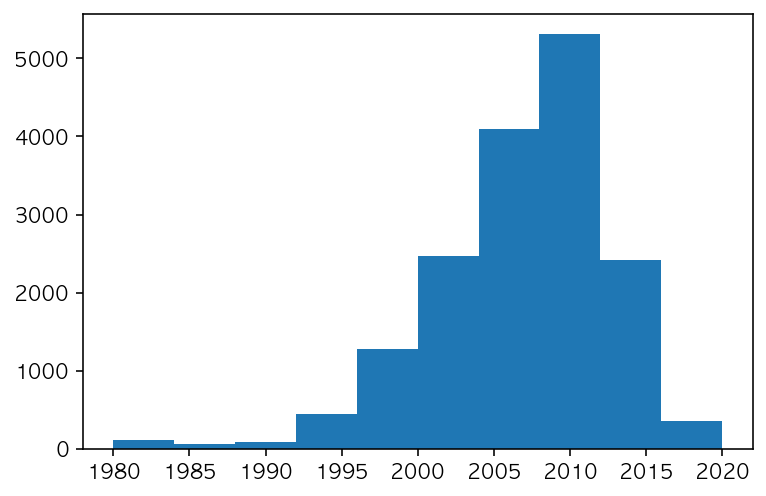

In [ ]:
plt.hist(df_raw['Year'])
plt.show()

## Publisher 전처리

In [ ]:
df_raw[df_raw['Publisher'].isna() == True] = df_raw[df_raw['Publisher'].isna() == True]
.fillna(value='Unknown', axis=1, inplace=False)

In [ ]:
df_raw['Publisher'].values

array(['Destineer', 'Namco Bandai Games', 'Alchemist', ...,
       'Take-Two Interactive', 'Tecmo Koei',
       'Sony Computer Entertainment'], dtype=object)

In [ ]:
df_raw.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [ ]:
df_raw["NA_Sales"] = df_raw["NA_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df_raw["EU_Sales"] = df_raw["EU_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df_raw["JP_Sales"] = df_raw["JP_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df_raw["Other_Sales"] = df_raw["Other_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
df_raw['Year'] = df_raw['Year'].astype(int)
df_raw.loc[1971, 'Genre'] = 'Role-Playing'

df_raw['Total_Sales'] = df_raw['NA_Sales'] + df_raw['EU_Sales'] + df_raw['JP_Sales'] + df_raw['Other_Sales']

df = df_raw
df

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16593                         Ice Age 2: The Meltdown       GC  2006   
16594                     Rainbow Islands: Revolution      PSP  2005   
16595                                        NBA 2K16      PS3  2015   
16596                     Toukiden: The Age of Demons      PSV  2013   
16597                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16593   Platform                Vivendi Games      0.15      0.04      0.00   
16594     Action            Rising Star Games      0.01      0.00      0.00   
16595     Sports         Take-Two Interactive      0.44      0.19      0.03   
16596     Action                   Tecmo Koei      0.05      0.05      0.25   
16597   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  Total_Sales  
0             0.00         0.04  
1             0.01         0.18  
2             0.00         0.02  
3             0.00         0.04  
4             0.04         0.25  
...            ...          ...  
16593         0.01         0.20  
16594         0.00         0.01  
16595         0.13         0.79  
16596         0.03         0.38  
16597         0.01         0.17  

[16598 rows x 10 columns]

## 지역에 따라서 선호하는 게임 장르가 다를까

In [ ]:
# 판매량이 존재하는 행의 장르별 갯수파악
na_genre = df[df['NA_Sales'] > 0].groupby('Genre')['NA_Sales'].size()
eu_genre = df[df['EU_Sales'] > 0].groupby('Genre')['EU_Sales'].count()
jp_genre = df[df['JP_Sales'] > 0].groupby('Genre')['JP_Sales'].count()
ot_genre = df[df['Other_Sales'] > 0].groupby('Genre')['Other_Sales'].count()

genre_df = pd.DataFrame(data=[na_genre, eu_genre, jp_genre, ot_genre]).T
genre_df = genre_df.reset_index()


# 판매량이 존재하는 행의 장르별 판매액 파악
na_genre_price = df[df['NA_Sales'] > 0].groupby('Genre')['NA_Sales'].sum()
eu_genre_price = df[df['EU_Sales'] > 0].groupby('Genre')['EU_Sales'].sum()
jp_genre_price = df[df['JP_Sales'] > 0].groupby('Genre')['JP_Sales'].sum()
ot_genre_price = df[df['Other_Sales'] > 0].groupby('Genre')['Other_Sales'].sum()

genre_price_df = pd.DataFrame(data=[na_genre_price, eu_genre_price, jp_genre_price, ot_genre_price]).T
genre_price_df = genre_price_df.reset_index()

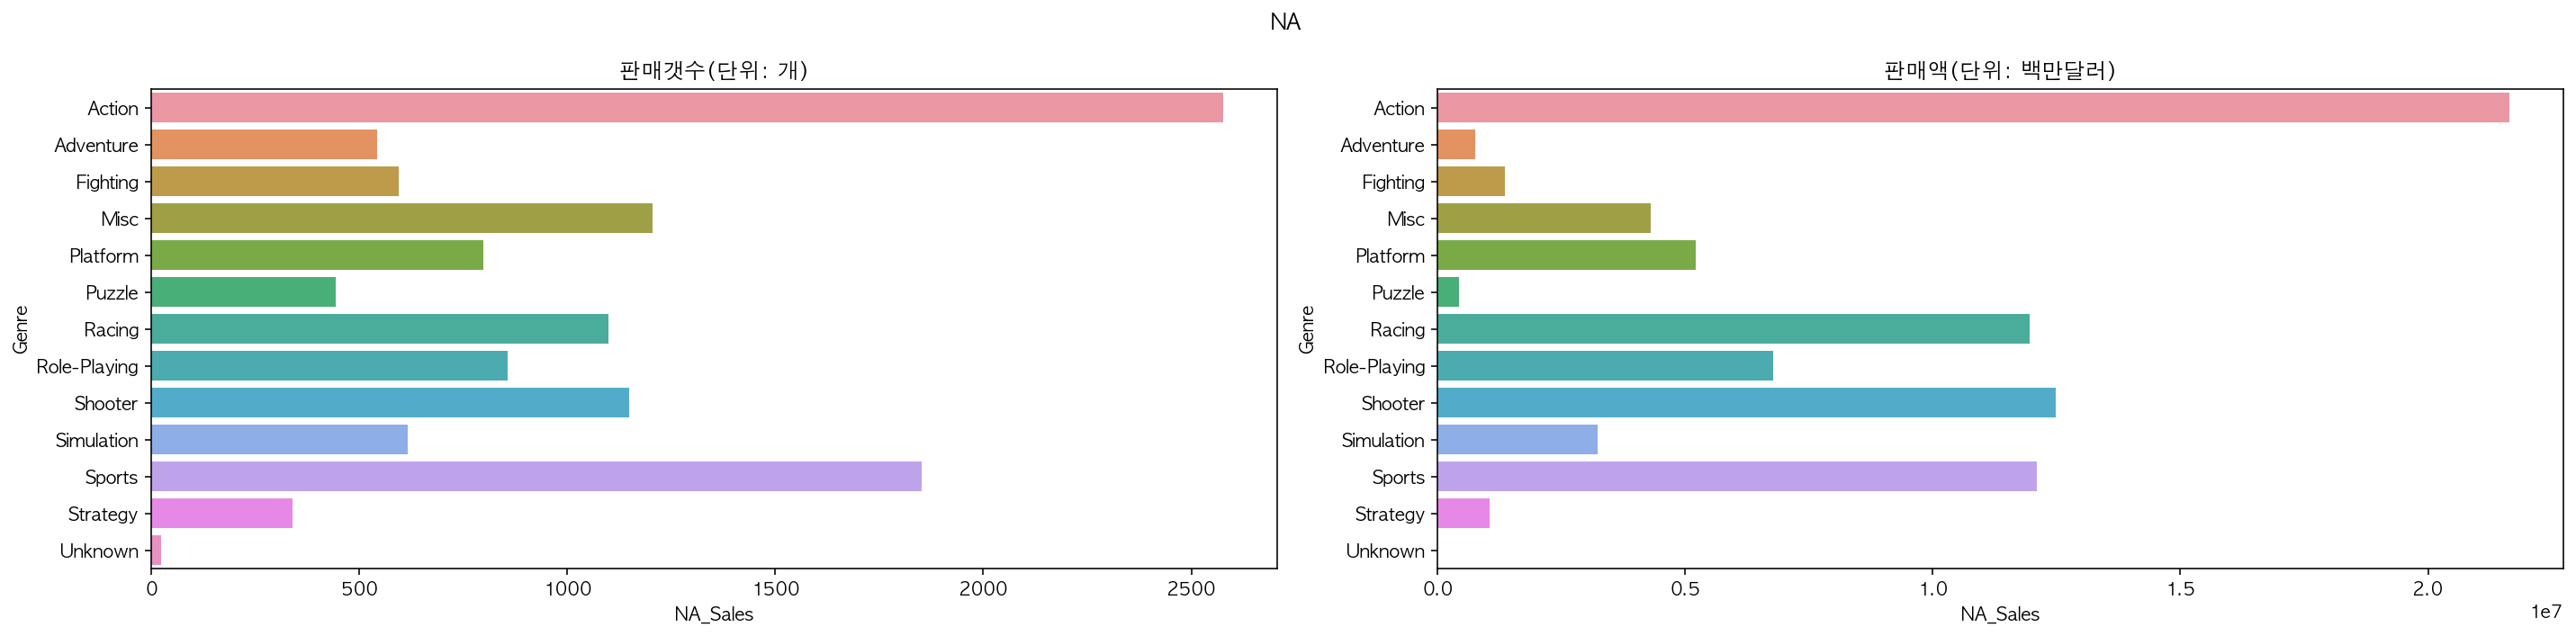

In [ ]:
#fig, ax = plt.subplots(ncols=2,constrained_layout=True)# <- 한 번만 실행 후 주석처리
fig = plt.figure(figsize=(20,5))
ax[0] = fig.add_subplot(121)
ax[1] = fig.add_subplot(122)
plt.suptitle("NA")

ax[0].set_title("판매갯수(단위: 개)")
sns.barplot(x= 'NA_Sales', y= 'Genre', data = genre_df, ax=ax[0])

ax[1].set_title("판매액(단위: 백만달러)")
sns.barplot(x= 'NA_Sales', y= 'Genre', data = genre_price_df, ax=ax[1])

fig.tight_layout()

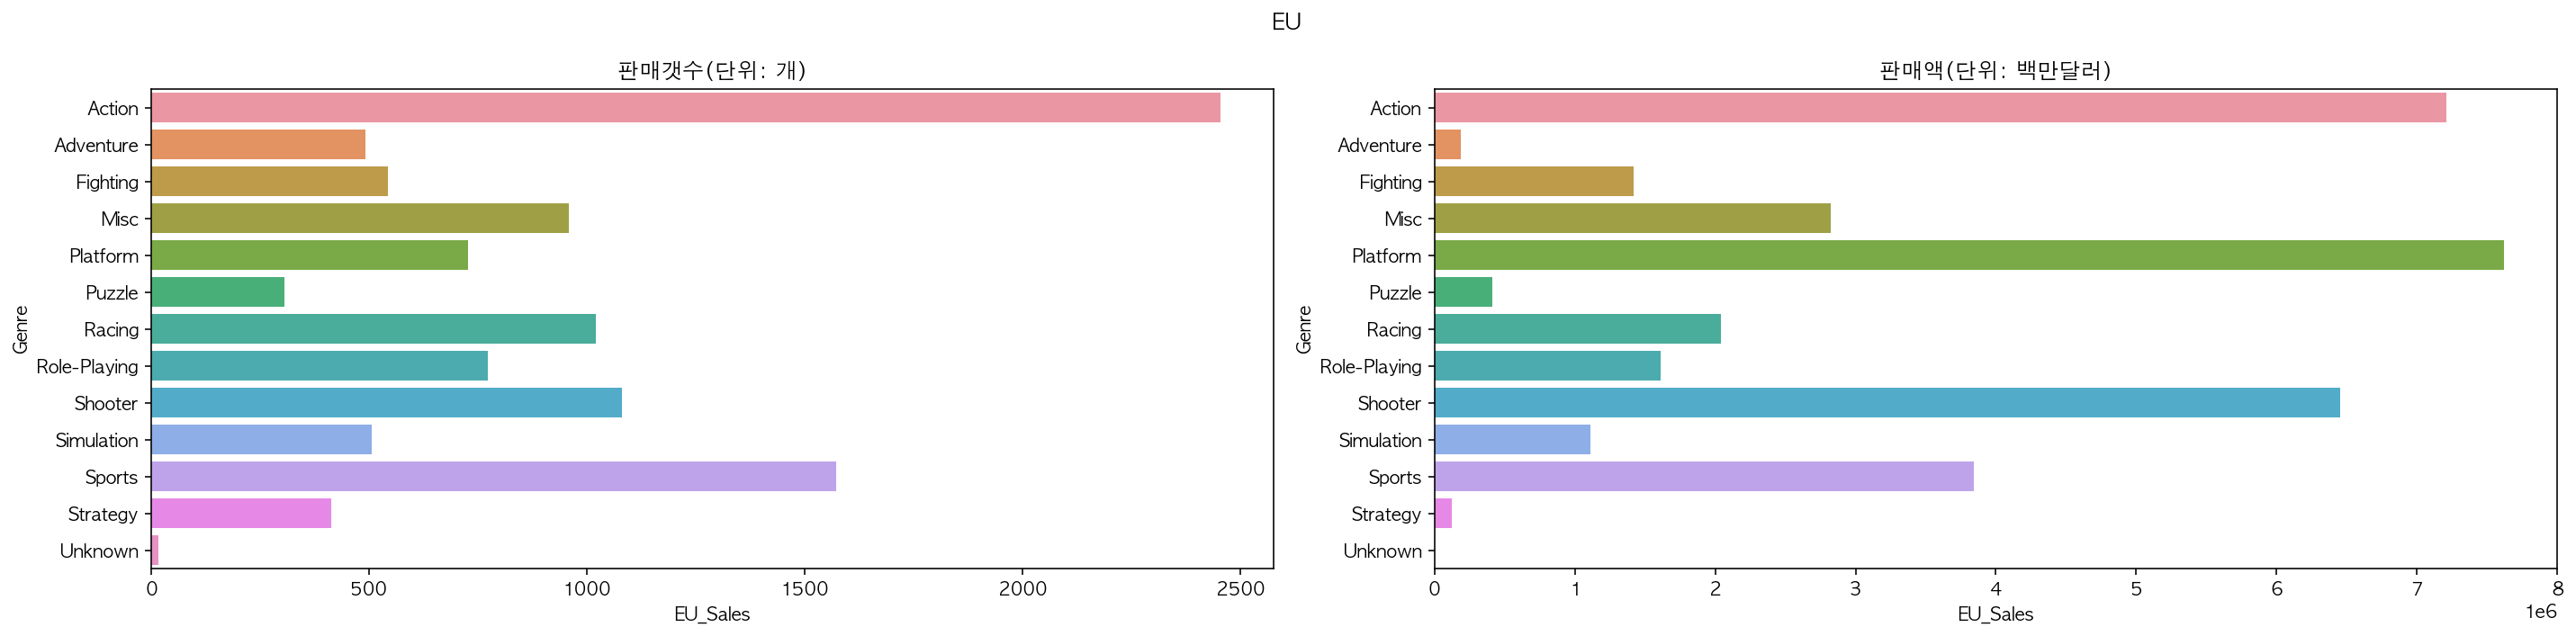

In [ ]:
fig = plt.figure(figsize=(20,5))
ax[0] = fig.add_subplot(121)
ax[1] = fig.add_subplot(122)
plt.suptitle("EU")

ax[0].set_title("판매갯수(단위: 개)")
sns.barplot(x= 'EU_Sales', y= 'Genre', data = genre_df, ax=ax[0])

ax[1].set_title("판매액(단위: 백만달러)")
sns.barplot(x= 'EU_Sales', y= 'Genre', data = genre_price_df, ax=ax[1])

fig.tight_layout()

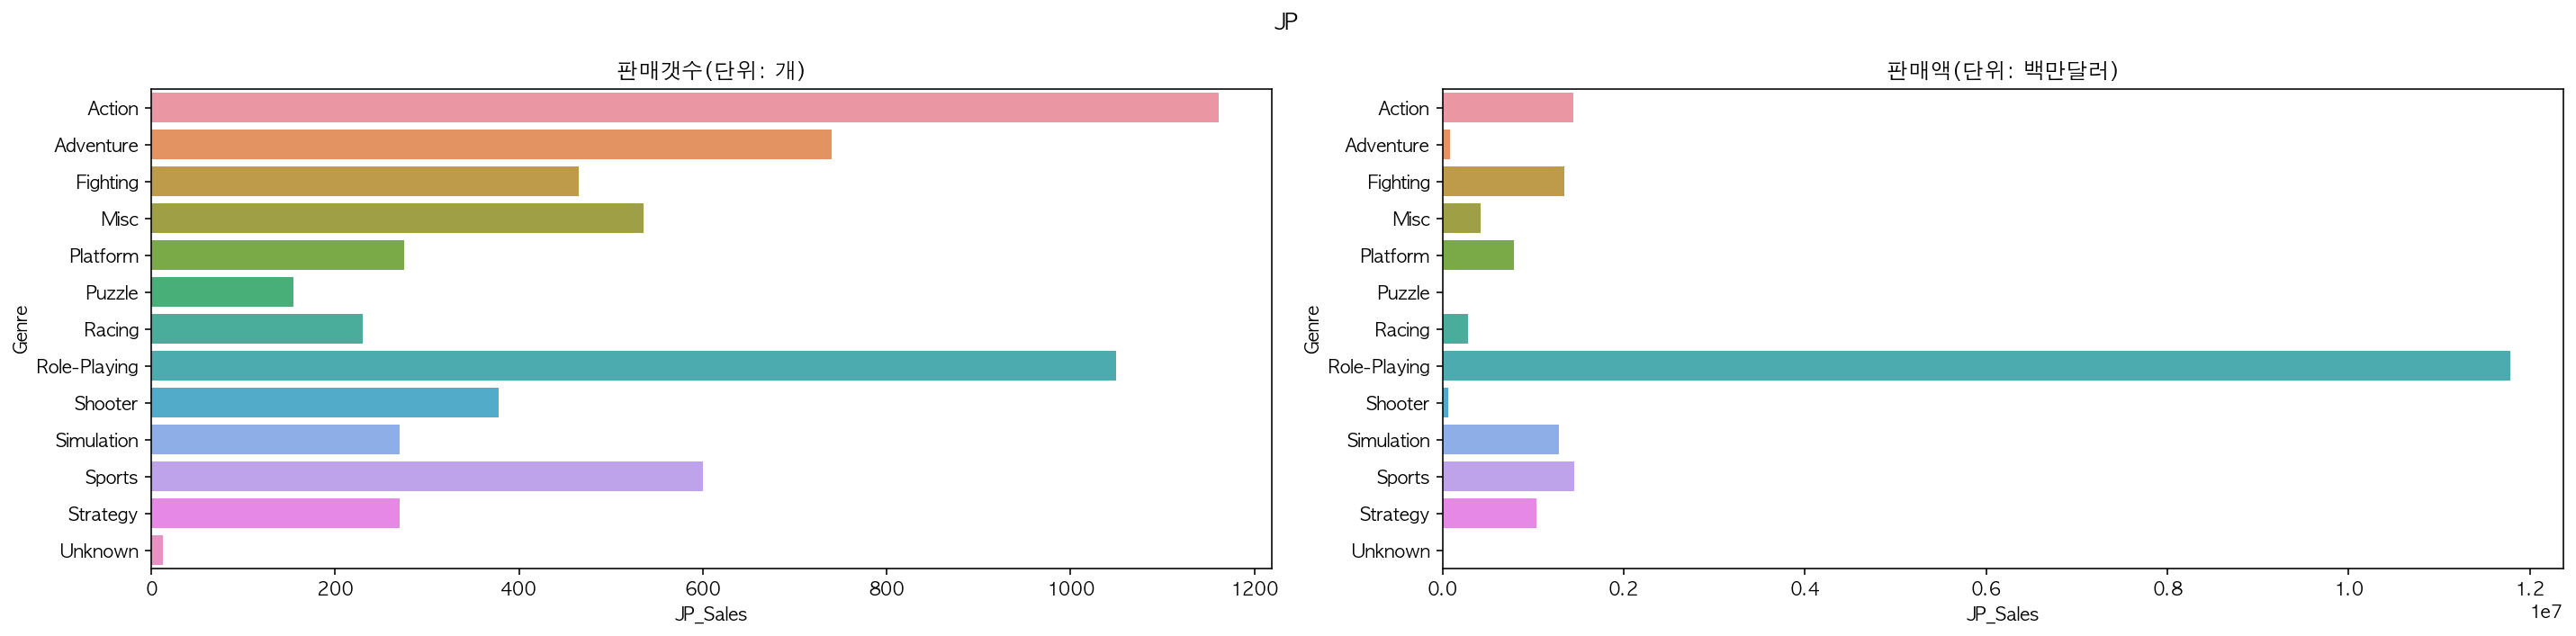

In [ ]:
fig = plt.figure(figsize=(20,5))
ax[0] = fig.add_subplot(121)
ax[1] = fig.add_subplot(122)
plt.suptitle("JP")

ax[0].set_title("판매갯수(단위: 개)")
sns.barplot(x= 'JP_Sales', y= 'Genre', data = genre_df, ax=ax[0])

ax[1].set_title("판매액(단위: 백만달러)")
sns.barplot(x= 'JP_Sales', y= 'Genre', data = genre_price_df, ax=ax[1])

fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(20,5))
ax[0] = fig.add_subplot(121)
ax[1] = fig.add_subplot(122)
plt.suptitle("Other")

ax[0].set_title("판매갯수(단위: 개)")
sns.barplot(x= 'Other_Sales', y= 'Genre', data = genre_df, ax=ax[0])

ax[1].set_title("판매액(단위: 백만달러)")
sns.barplot(x= 'Other_Sales', y= 'Genre', data = genre_price_df, ax=ax[1])

fig.tight_layout()

## 연도별 게임의 트렌드가 있을까

In [ ]:
a = pd.crosstab(df['Year'], df['Genre'])
a.style.highlight_max(color = 'yellow', axis = 1)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(pd.crosstab(df['Year'], df['Genre']), cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='Genre', ylabel='Year'>

## 지역별 연도별 트렌드

In [ ]:
na_df = df[df['NA_Sales'] > 0]

na_trand = pd.crosstab(na_df['Year'], na_df['Genre'])
na_trand.style.highlight_max(color = 'yellow', axis = 1)

<AxesSubplot:xlabel='Genre', ylabel='Year'>

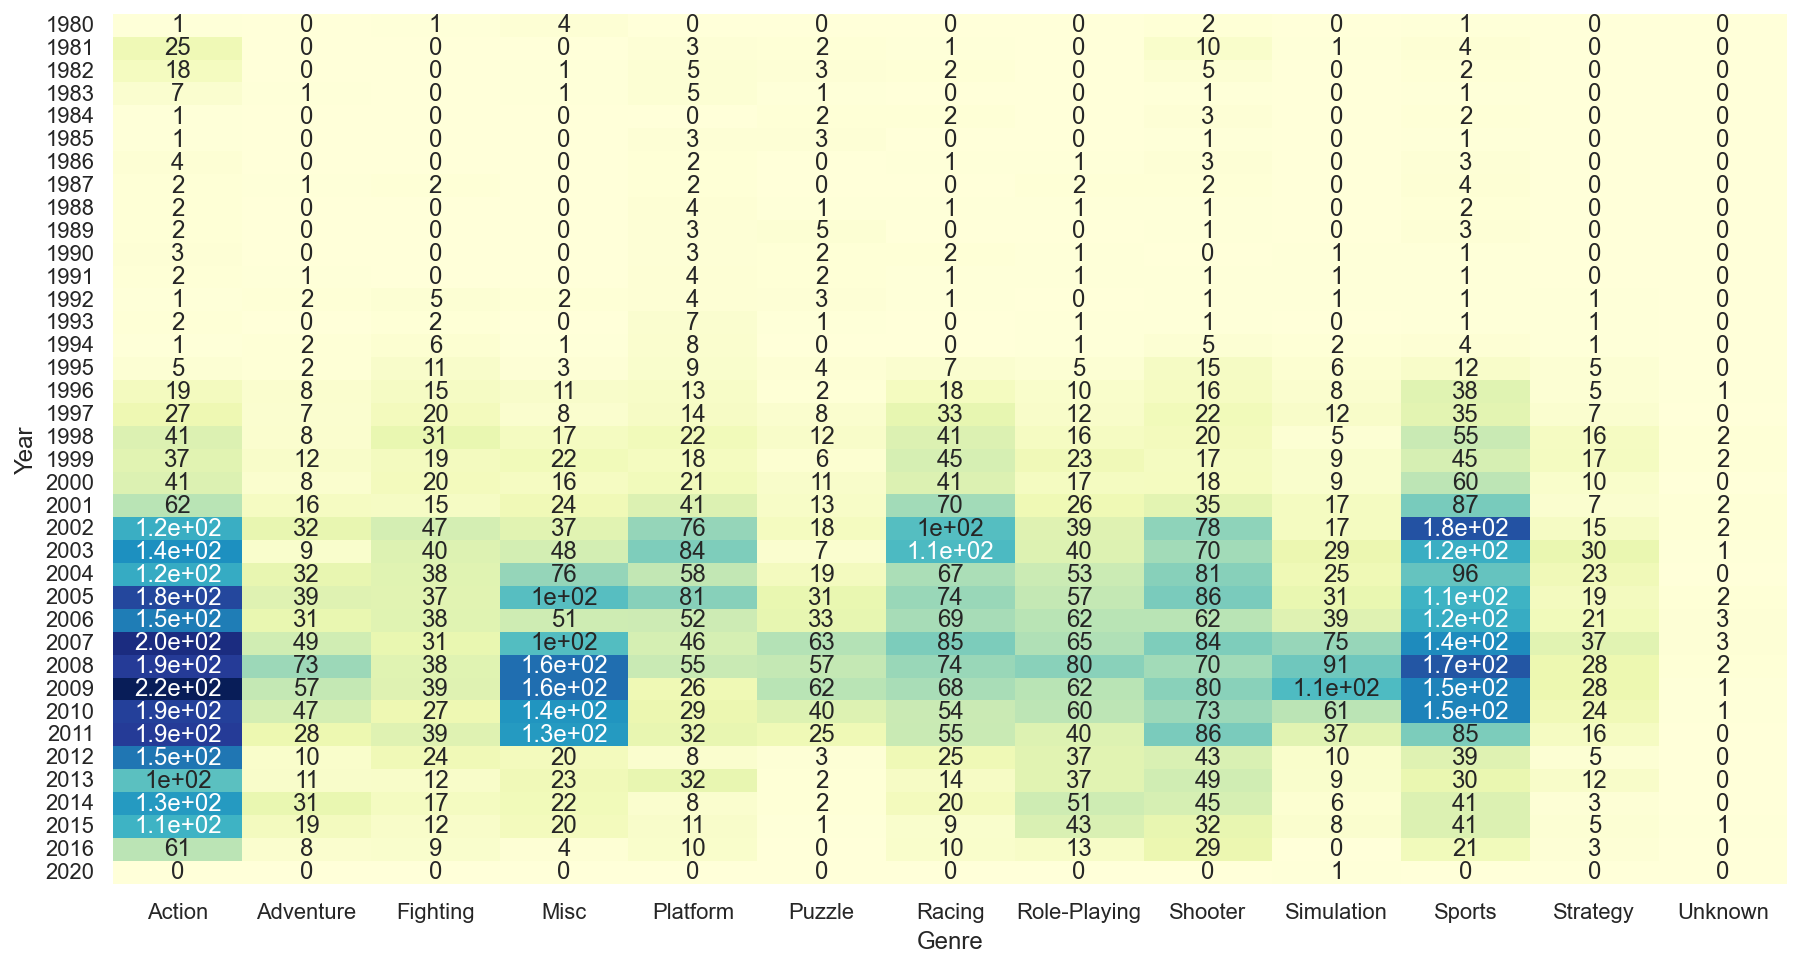

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(na_trand, cmap="YlGnBu", annot=True, cbar=False)

In [ ]:
eu_df = df[df['EU_Sales'] > 0]

eu_trand = pd.crosstab(eu_df['Year'], eu_df['Genre'])
eu_trand.style.highlight_max(color = 'yellow', axis = 1)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(eu_trand, cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='Genre', ylabel='Year'>

In [ ]:
jp_df = df[df['JP_Sales'] > 0]

jp_trand = pd.crosstab(jp_df['Year'], jp_df['Genre'])
jp_trand.style.highlight_max(color = 'yellow', axis = 1)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(jp_trand, cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='Genre', ylabel='Year'>

In [ ]:
ot_df = df[df['Other_Sales'] > 0]

ot_trand = pd.crosstab(ot_df['Year'], ot_df['Genre'])
ot_trand.style.highlight_max(color = 'yellow', axis = 1)

<AxesSubplot:xlabel='Genre', ylabel='Year'>

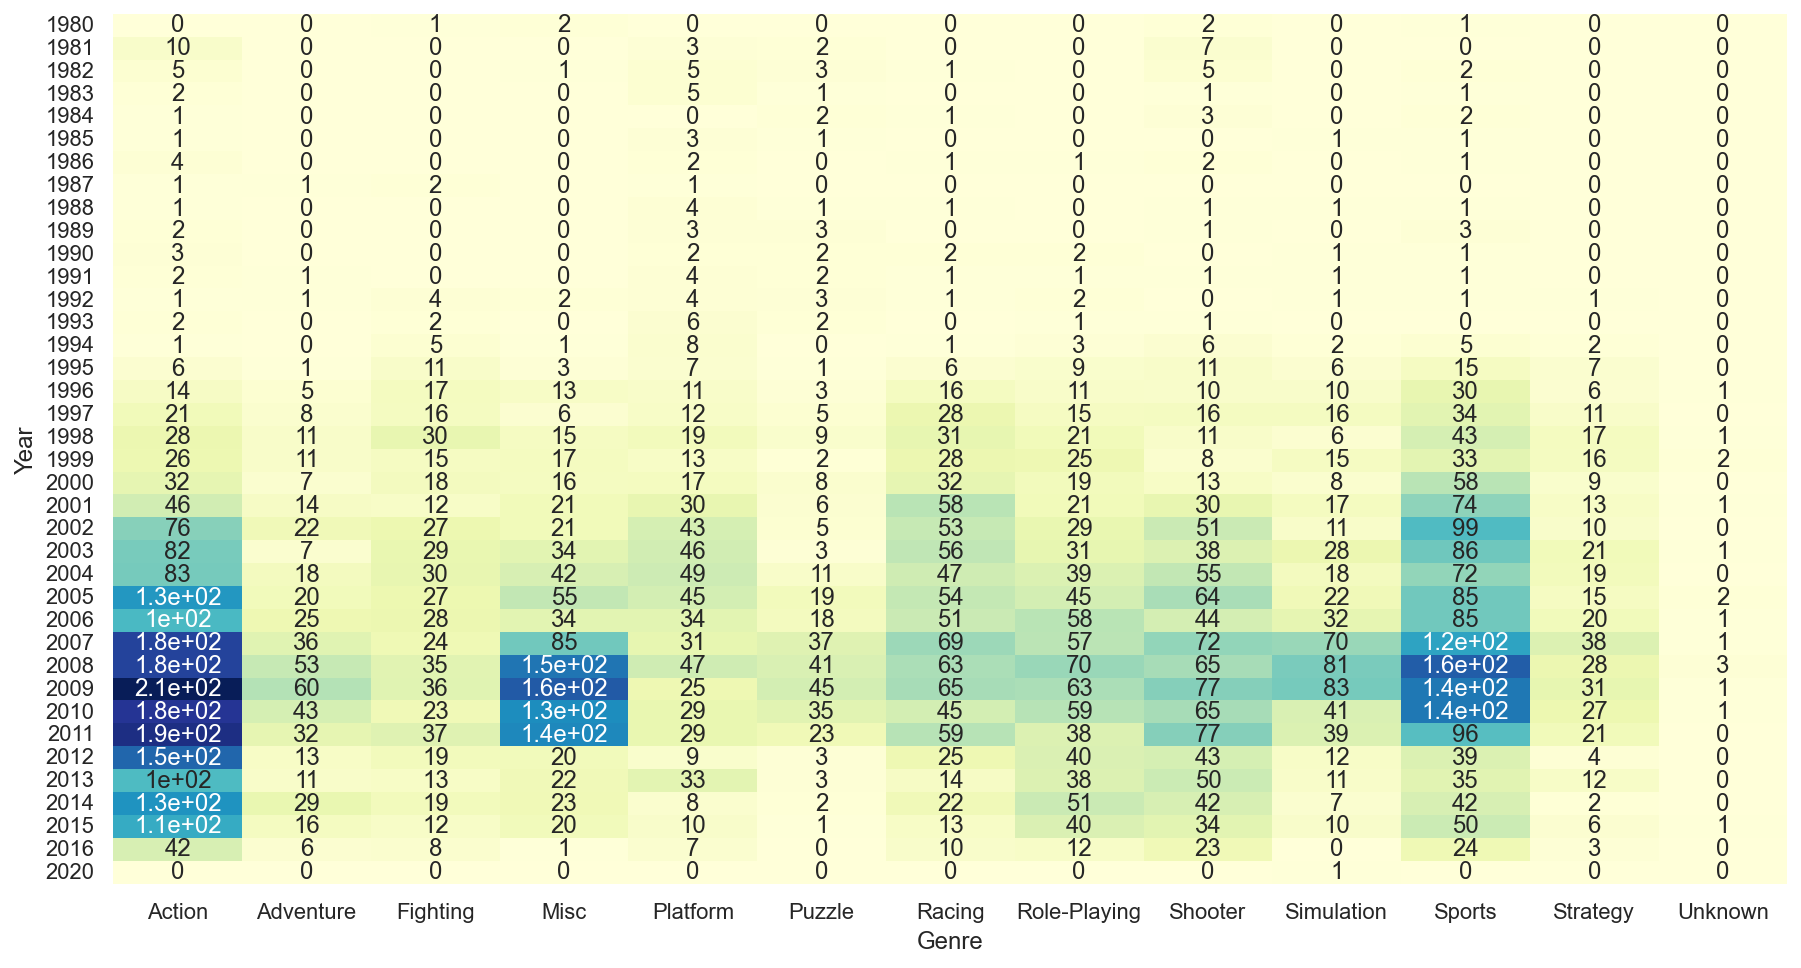

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(ot_trand, cmap="YlGnBu", annot=True, cbar=False)

## 최고판매량을 기록한 게임 등 자잘한 데이터 파헤치기

In [ ]:
na_df[['Year', 'Name', 'Genre', 'NA_Sales']].groupby(['Year', 'Genre']).sum()
pokemon = df[df['Name'].str.contains("Pokemon")]
print('롤플레잉 포켓몬게임 평균')
print(pokemon[pokemon['Genre'] == 'Role-Playing'].mean())
print('\n전체 데이터 평균')
print(df.mean())
#df[df['Name'].str.contains("Pokemon")]

롤플레잉 포켓몬게임 평균
Year             2007.5500
NA_Sales       258502.9340
EU_Sales            2.1425
JP_Sales       157502.5740
Other_Sales         0.3945
Total_Sales    416008.0450
dtype: float64

전체 데이터 평균
Year           2006.416918
NA_Sales       4900.247718
EU_Sales       2099.192631
JP_Sales       1202.631104
Other_Sales     453.114244
Total_Sales    8655.185697
dtype: float64


In [ ]:
# 전체 판매액 1위
df[df['Total_Sales'] >= df['Total_Sales'].max()]

Name Platform  Year   Genre             Publisher  \
10913  Grand Theft Auto V     X360  2013  Action  Take-Two Interactive   

        NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
10913  9630000.0      5.31      0.06         1.38   9630006.75

In [ ]:
top_na = df[df['NA_Sales'] >= df['NA_Sales'].max()] # 북미 및 전체 판매액 1위
top_eu = df[df['EU_Sales'] >= df['EU_Sales'].max()]
top_jp = df[df['JP_Sales'] >= df['JP_Sales'].max()]
top_ot = df[df['Other_Sales'] >= df['Other_Sales'].max()]

#display(top_na,top_eu,top_jp,top_ot)
display(pd.concat([top_na,top_eu,top_jp,top_ot]))

Name Platform  Year         Genre  \
10913                 Grand Theft Auto V     X360  2013        Action   
7865                             FIFA 14     X360  2013        Sports   
1810   Pokemon FireRed/Pokemon LeafGreen      GBA  2004  Role-Playing   
6812                           Fallout 3      PS3  2008  Role-Playing   

                  Publisher    NA_Sales    EU_Sales    JP_Sales  Other_Sales  \
10913  Take-Two Interactive  9630000.00        5.31        0.06         1.38   
7865        Electronic Arts        0.92  2930000.00        0.01         0.46   
1810               Nintendo        4.34        2.65  3150000.00         0.35   
6812     Bethesda Softworks        2.15        1.20        0.07    590000.00   

       Total_Sales  
10913   9630006.75  
7865    2930001.39  
1810    3150007.34  
6812     590003.42

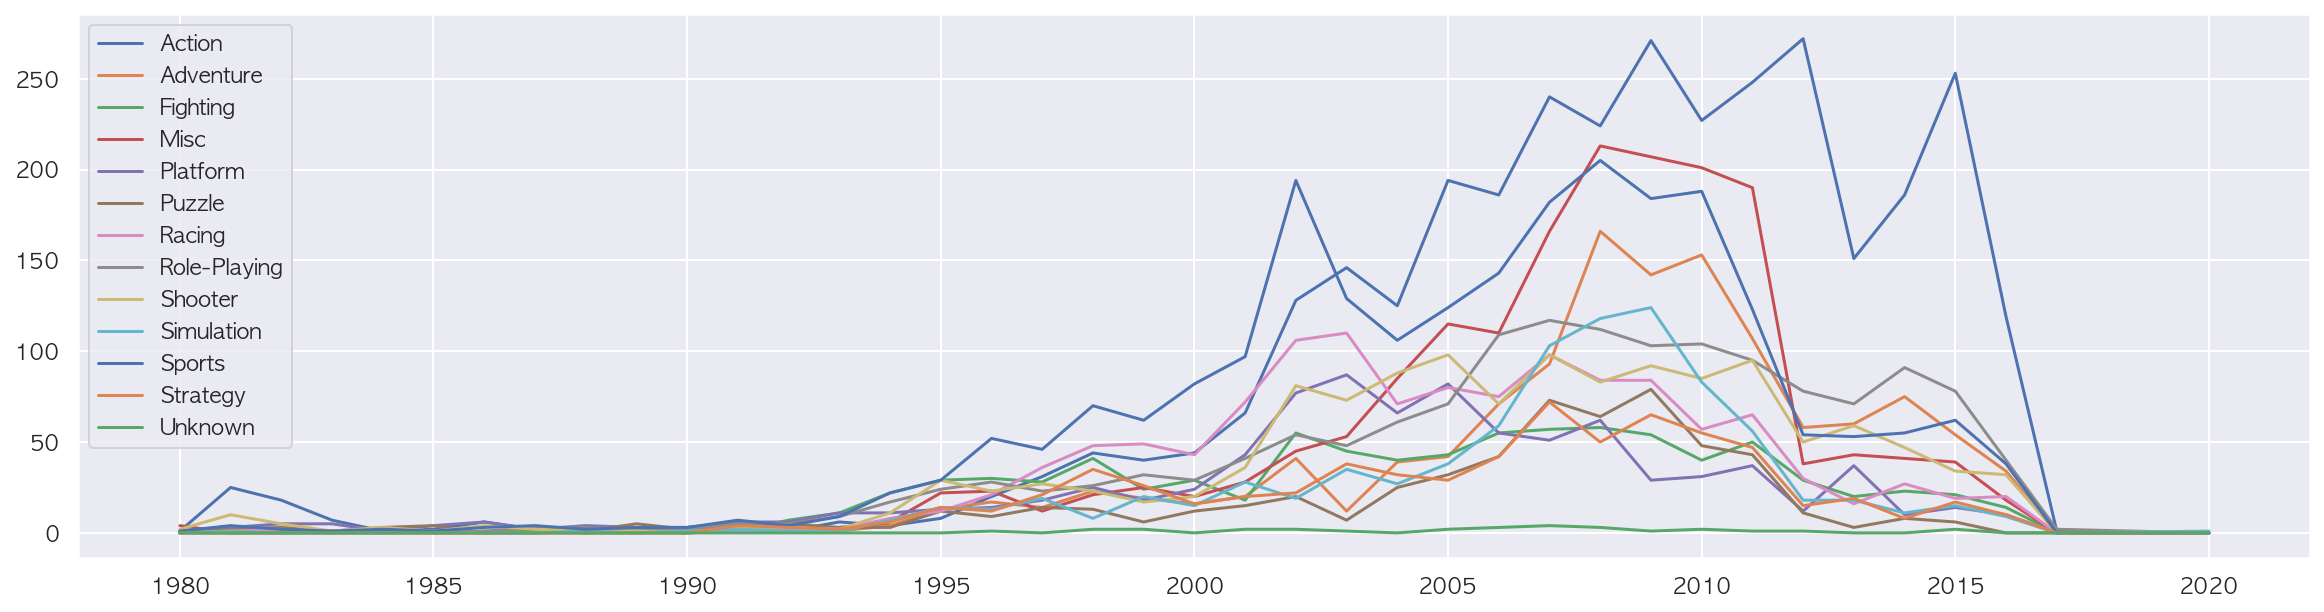

In [ ]:
# 장르별 판매경향은? (지역별 분류도)
## 연도별 판매된 게임의 장르개수 경향

fig = plt.figure(figsize=(20,5))
plt.plot(a, label=a.columns)
plt.legend(loc='upper left')

In [ ]:
genre_sales_df = pd.DataFrame()

for i in a.columns:
    
    genre_sales_df[i] = df.groupby(['Genre','Year'])['Total_Sales'].sum()[i]

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(genre_sales_df, label=genre_sales_df.columns)
plt.legend(loc='upper left')

In [ ]:
# 각 년도별 장르출시 개수와 판매액의 상관관계 분석
#b = pd.crosstab(df['Year'], df['Genre'])
#df[['Year','Genre','Total_Sales']].groupby(['Year','Genre'])['Total_Sales'].sum()

b = df[['Year','Genre','Total_Sales']]
b

Year      Genre  Total_Sales
0      2008     Action         0.04
1      2009     Action         0.18
2      2010  Adventure         0.02
3      2010       Misc         0.04
4      2010   Platform         0.25
...     ...        ...          ...
16593  2006   Platform         0.20
16594  2005     Action         0.01
16595  2015     Sports         0.79
16596  2013     Action         0.38
16597  1996   Fighting         0.17

[16598 rows x 3 columns]

In [ ]:
year_list = []
genre_list = []
genre_count_list = []
total_sales_list = []

for x in b['Genre'].unique():
    
    for y in b['Year'].unique():
        q = a.T.loc[x,y]
        r = x
        s = y
        t = b.loc[b['Genre'] == r,:].loc[b['Year'] == y,:]['Total_Sales'].sum()
        
        year_list.append(s)
        genre_list.append(r)
        genre_count_list.append(q)
        total_sales_list.append(t)
        
count_raw = pd.DataFrame(data={'Year':year_list,
                              'Genre':genre_list,
                              'Genre_count':genre_count_list,
                              'Total_Sales':total_sales_list})

count_raw

Year    Genre  Genre_count  Total_Sales
0    2008   Action          224   2970140.33
1    2009   Action          271   1370136.95
2    2010   Action          227    310117.36
3    2005   Action          194    100086.38
4    2011   Action          248    420120.83
..    ...      ...          ...          ...
502  1989  Unknown            0         0.00
503  1986  Unknown            0         0.00
504  2017  Unknown            0         0.00
505  1980  Unknown            0         0.00
506  2020  Unknown            0         0.00

[507 rows x 4 columns]

In [ ]:
count_raw.loc[count_raw['Genre'] == 'Action',:].loc[count_raw['Year'] == 1980,:]['Total_Sales'].sum()

0.34

In [ ]:
# 장르별 판매 갯수와 총 판매액의 상관관계 조사

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(count_raw[['Genre_count','Total_Sales']])

count_scaled = scaler.transform(count_raw[['Genre_count','Total_Sales']])

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
count_df_scaled = pd.DataFrame(data=count_scaled, columns=['Genre_count','Total_Sales'])
print('상관계수')
display(count_df_scaled.corr())

#values, vectors = np.linalg.eig(count_df_scaled.cov())
#print("\n Eigenvalues: \n", values)
#print("\n Eigenvectors: \n", vectors)

상관계수


Genre_count  Total_Sales
Genre_count     1.000000     0.391487
Total_Sales     0.391487     1.000000

In [ ]:
plt.scatter(count_df_scaled['Genre_count'], count_df_scaled['Total_Sales'])

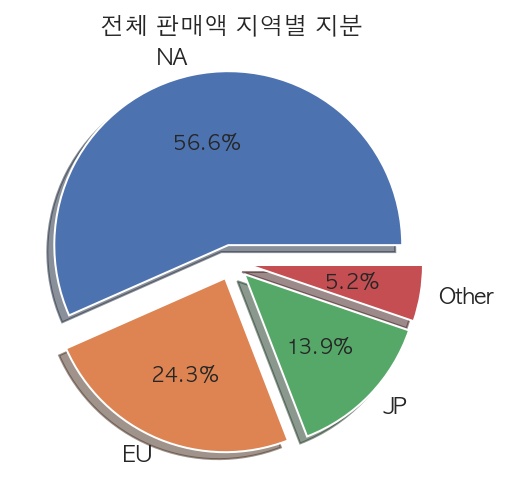

In [ ]:
# 전체 판매액에서 각 지역이 차지하는 비율

ratio = [df['NA_Sales'].sum()/df['Total_Sales'].sum(), df['EU_Sales'].sum()/df['Total_Sales'].sum(),
         df['JP_Sales'].sum()/df['Total_Sales'].sum(), df['Other_Sales'].sum()/df['Total_Sales'].sum()]
explode = [0.1, 0.1, 0.1, 0.1]

plt.pie(ratio, labels=['NA', 'EU', 'JP', 'Other'], autopct='%.1f%%',explode=explode, shadow=True)
plt.title('전체 판매액 지역별 지분')
plt.show()